In [180]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.metrics import r2_score
from scipy import stats
import seaborn as sns
import subprocess
import numpy as np
import gzip

## 1. Merge results

In [2]:
param_dir = '/data100t1/home/wanying/CCHC/lipidomics/prediction_models/elastic_net/training/model_params/'
for fn in os.listdir(param_dir):
    if ('20230424' in fn) and ('alpha' not in fn) and not fn.endswith('pred'):
        print(f"'{fn}'")

In [50]:
lst_fn=['lipid_species_l1_0.5_0-5_100_alpha_CV.txt.20230501_02:48:44.pred', 
'lipid_species_l1_0.5_1-32_100alphaCV.txt.pred', 
'lipid_species_l1_0.5_33-77_100alphaCV.txt.20230426_01:45:47.pred', 
'lipid_species_l1_0.5_78-122_100alphaCV.txt.20230426_01:46:08.pred', 
'lipid_species_l1_0.5_123-128_100alphaCV.txt.20230426_01:48:32.pred', 
'lipid_species_l1_0.5_129-167_100alphaCV.txt.20230426_23:15:36.pred', 
'lipid_species_l1_0.5_168-174_100alphaCV.txt.20230426_01:48:59.pred', 
'lipid_species_l1_0.5_175-212_100alphaCV.txt.20230426_23:15:36.pred', 
'lipid_species_l1_0.5_213-257_100alphaCV.txt.20230426_01:50:09.pred', 
'lipid_species_l1_0.5_258-302_100alphaCV.txt.20230426_01:51:29.pred', 
'lipid_species_l1_0.5_303-347_100alphaCV.txt.20230426_01:51:49.pred', 
'lipid_species_l1_0.5_348-392_100alphaCV.txt.20230426_01:52:07.pred', 
'lipid_species_l1_0.5_393-437_100alphaCV.txt.20230426_01:52:27.pred', 
'lipid_species_l1_0.5_438-482_100alphaCV.txt.20230426_01:52:42.pred', 
'lipid_species_l1_0.5_483-505_100alphaCV.txt.20230426_01:52:59.pred', 
'lipid_species_l1_0.5_506-527_100alphaCV.txt.20230428_13:00:20.pred', 
'lipid_species_l1_0.5_528-549_100alphaCV.txt.20230426_01:53:13.pred', 
'lipid_species_l1_0.5_550-572_100alphaCV.txt.20230428_13:01:28.pred', 
'lipid_species_l1_0.5_573-617_100alphaCV.txt.20230426_01:58:40.pred', 
'lipid_species_l1_0.5_618-662_100alphaCV.txt.20230426_01:58:40.pred', 
'lipid_species_l1_0.5_663-707_100alphaCV.txt.20230426_02:00:43.pred', 
'lipid_species_l1_0.5_708-752_100alphaCV.txt.20230426_02:00:47.pred', 
'lipid_species_l1_0.5_753-797_100alphaCV.txt.20230426_02:00:59.pred', 
'lipid_species_l1_0.5_798-842_100alphaCV.txt.20230426_02:01:17.pred']

for fn in lst_fn:
    print(f'{fn} \\')
    # print(f'{fn}.pred \\')
    # print(f"{fn.split('.pred')[0]} \\")


lipid_species_l1_0.5_0-5_100_alpha_CV.txt.20230501_02:48:44.pred \
lipid_species_l1_0.5_1-32_100alphaCV.txt.pred \
lipid_species_l1_0.5_33-77_100alphaCV.txt.20230426_01:45:47.pred \
lipid_species_l1_0.5_78-122_100alphaCV.txt.20230426_01:46:08.pred \
lipid_species_l1_0.5_123-128_100alphaCV.txt.20230426_01:48:32.pred \
lipid_species_l1_0.5_129-167_100alphaCV.txt.20230426_23:15:36.pred \
lipid_species_l1_0.5_168-174_100alphaCV.txt.20230426_01:48:59.pred \
lipid_species_l1_0.5_175-212_100alphaCV.txt.20230426_23:15:36.pred \
lipid_species_l1_0.5_213-257_100alphaCV.txt.20230426_01:50:09.pred \
lipid_species_l1_0.5_258-302_100alphaCV.txt.20230426_01:51:29.pred \
lipid_species_l1_0.5_303-347_100alphaCV.txt.20230426_01:51:49.pred \
lipid_species_l1_0.5_348-392_100alphaCV.txt.20230426_01:52:07.pred \
lipid_species_l1_0.5_393-437_100alphaCV.txt.20230426_01:52:27.pred \
lipid_species_l1_0.5_438-482_100alphaCV.txt.20230426_01:52:42.pred \
lipid_species_l1_0.5_483-505_100alphaCV.txt.20230426_01:52:5

In [44]:
%%bash
cd /data100t1/home/wanying/CCHC/lipidomics/prediction_models/elastic_net/training/model_params/100alphas

for fn in lipid_species_l1_0.5_0-5_100_alpha_CV.txt.20230501_02:48:44 \
lipid_species_l1_0.5_1-32_100alphaCV.txt \
lipid_species_l1_0.5_33-77_100alphaCV.txt.20230426_01:45:47 \
lipid_species_l1_0.5_78-122_100alphaCV.txt.20230426_01:46:08 \
lipid_species_l1_0.5_123-128_100alphaCV.txt.20230426_01:48:32 \
lipid_species_l1_0.5_129-167_100alphaCV.txt.20230426_23:15:36 \
lipid_species_l1_0.5_168-174_100alphaCV.txt.20230426_01:48:59 \
lipid_species_l1_0.5_175-212_100alphaCV.txt.20230426_23:15:36 \
lipid_species_l1_0.5_213-257_100alphaCV.txt.20230426_01:50:09 \
lipid_species_l1_0.5_258-302_100alphaCV.txt.20230426_01:51:29 \
lipid_species_l1_0.5_303-347_100alphaCV.txt.20230426_01:51:49 \
lipid_species_l1_0.5_348-392_100alphaCV.txt.20230426_01:52:07 \
lipid_species_l1_0.5_393-437_100alphaCV.txt.20230426_01:52:27 \
lipid_species_l1_0.5_438-482_100alphaCV.txt.20230426_01:52:42 \
lipid_species_l1_0.5_483-505_100alphaCV.txt.20230426_01:52:59 \
lipid_species_l1_0.5_506-527_100alphaCV.txt.20230428_13:00:20 \
lipid_species_l1_0.5_528-549_100alphaCV.txt.20230426_01:53:13 \
lipid_species_l1_0.5_550-572_100alphaCV.txt.20230428_13:01:28 \
lipid_species_l1_0.5_573-617_100alphaCV.txt.20230426_01:58:40 \
lipid_species_l1_0.5_618-662_100alphaCV.txt.20230426_01:58:40 \
lipid_species_l1_0.5_663-707_100alphaCV.txt.20230426_02:00:43 \
lipid_species_l1_0.5_708-752_100alphaCV.txt.20230426_02:00:47 \
lipid_species_l1_0.5_753-797_100alphaCV.txt.20230426_02:00:59 \
lipid_species_l1_0.5_798-842_100alphaCV.txt.20230426_02:01:17 ; do wc -l ${fn}; done


2 lipid_species_l1_0.5_0-5_100_alpha_CV.txt.20230501_02:48:44
34 lipid_species_l1_0.5_1-32_100alphaCV.txt
46 lipid_species_l1_0.5_33-77_100alphaCV.txt.20230426_01:45:47
46 lipid_species_l1_0.5_78-122_100alphaCV.txt.20230426_01:46:08
7 lipid_species_l1_0.5_123-128_100alphaCV.txt.20230426_01:48:32
40 lipid_species_l1_0.5_129-167_100alphaCV.txt.20230426_23:15:36
8 lipid_species_l1_0.5_168-174_100alphaCV.txt.20230426_01:48:59
39 lipid_species_l1_0.5_175-212_100alphaCV.txt.20230426_23:15:36
46 lipid_species_l1_0.5_213-257_100alphaCV.txt.20230426_01:50:09
46 lipid_species_l1_0.5_258-302_100alphaCV.txt.20230426_01:51:29
46 lipid_species_l1_0.5_303-347_100alphaCV.txt.20230426_01:51:49
46 lipid_species_l1_0.5_348-392_100alphaCV.txt.20230426_01:52:07
46 lipid_species_l1_0.5_393-437_100alphaCV.txt.20230426_01:52:27
46 lipid_species_l1_0.5_438-482_100alphaCV.txt.20230426_01:52:42
24 lipid_species_l1_0.5_483-505_100alphaCV.txt.20230426_01:52:59
22 lipid_species_l1_0.5_506-527_100alphaCV.txt.2023042

In [46]:
my_str = '''
2 lipid_species_l1_0.5_0-5_100_alpha_CV.txt.20230501_02:48:44
34 lipid_species_l1_0.5_1-32_100alphaCV.txt
46 lipid_species_l1_0.5_33-77_100alphaCV.txt.20230426_01:45:47
46 lipid_species_l1_0.5_78-122_100alphaCV.txt.20230426_01:46:08
7 lipid_species_l1_0.5_123-128_100alphaCV.txt.20230426_01:48:32
40 lipid_species_l1_0.5_129-167_100alphaCV.txt.20230426_23:15:36
8 lipid_species_l1_0.5_168-174_100alphaCV.txt.20230426_01:48:59
39 lipid_species_l1_0.5_175-212_100alphaCV.txt.20230426_23:15:36
46 lipid_species_l1_0.5_213-257_100alphaCV.txt.20230426_01:50:09
46 lipid_species_l1_0.5_258-302_100alphaCV.txt.20230426_01:51:29
46 lipid_species_l1_0.5_303-347_100alphaCV.txt.20230426_01:51:49
46 lipid_species_l1_0.5_348-392_100alphaCV.txt.20230426_01:52:07
46 lipid_species_l1_0.5_393-437_100alphaCV.txt.20230426_01:52:27
46 lipid_species_l1_0.5_438-482_100alphaCV.txt.20230426_01:52:42
24 lipid_species_l1_0.5_483-505_100alphaCV.txt.20230426_01:52:59
22 lipid_species_l1_0.5_506-527_100alphaCV.txt.20230428_13:00:20
23 lipid_species_l1_0.5_528-549_100alphaCV.txt.20230426_01:53:13
24 lipid_species_l1_0.5_550-572_100alphaCV.txt.20230428_13:01:28
46 lipid_species_l1_0.5_573-617_100alphaCV.txt.20230426_01:58:40
46 lipid_species_l1_0.5_618-662_100alphaCV.txt.20230426_01:58:40
46 lipid_species_l1_0.5_663-707_100alphaCV.txt.20230426_02:00:43
46 lipid_species_l1_0.5_708-752_100alphaCV.txt.20230426_02:00:47
46 lipid_species_l1_0.5_753-797_100alphaCV.txt.20230426_02:00:59
32 lipid_species_l1_0.5_798-842_100alphaCV.txt.20230426_02:01:17'''

count = 0
# count_lst = []
for val in my_str.split():
    if not val.startswith('lipid'):
        count += int(val) - 1
        # count_lst.append(int(val) - 1)
        # print(val)
count
# indx = 0
# for val in my_str.split():
#     if val.startswith('lipid'):
#         window = val.split('l1_0.5_')[-1].split('_100alphaCV.txt')[0]
#         size = int(window.split('-')[1]) - int(window.split('-')[0]) + 1
#         print(window, size, count_lst[indx])
#         indx += 1
#         # print(window)

829

In [51]:
'''%%bash
cd /data100t1/home/wanying/CCHC/lipidomics/prediction_models/elastic_net/training/model_params/100alphas

for fn in lipid_species_l1_0.5_0-5_100_alpha_CV.txt.20230501_02:48:44.pred \
lipid_species_l1_0.5_1-32_100alphaCV.txt.pred \
lipid_species_l1_0.5_33-77_100alphaCV.txt.20230426_01:45:47.pred \
lipid_species_l1_0.5_78-122_100alphaCV.txt.20230426_01:46:08.pred \
lipid_species_l1_0.5_123-128_100alphaCV.txt.20230426_01:48:32.pred \
lipid_species_l1_0.5_129-167_100alphaCV.txt.20230426_23:15:36.pred \
lipid_species_l1_0.5_168-174_100alphaCV.txt.20230426_01:48:59.pred \
lipid_species_l1_0.5_175-212_100alphaCV.txt.20230426_23:15:36.pred \
lipid_species_l1_0.5_213-257_100alphaCV.txt.20230426_01:50:09.pred \
lipid_species_l1_0.5_258-302_100alphaCV.txt.20230426_01:51:29.pred \
lipid_species_l1_0.5_303-347_100alphaCV.txt.20230426_01:51:49.pred \
lipid_species_l1_0.5_348-392_100alphaCV.txt.20230426_01:52:07.pred \
lipid_species_l1_0.5_393-437_100alphaCV.txt.20230426_01:52:27.pred \
lipid_species_l1_0.5_438-482_100alphaCV.txt.20230426_01:52:42.pred \
lipid_species_l1_0.5_483-505_100alphaCV.txt.20230426_01:52:59.pred \
lipid_species_l1_0.5_506-527_100alphaCV.txt.20230428_13:00:20.pred \
lipid_species_l1_0.5_528-549_100alphaCV.txt.20230426_01:53:13.pred \
lipid_species_l1_0.5_550-572_100alphaCV.txt.20230428_13:01:28.pred \
lipid_species_l1_0.5_573-617_100alphaCV.txt.20230426_01:58:40.pred \
lipid_species_l1_0.5_618-662_100alphaCV.txt.20230426_01:58:40.pred \
lipid_species_l1_0.5_663-707_100alphaCV.txt.20230426_02:00:43.pred \
lipid_species_l1_0.5_708-752_100alphaCV.txt.20230426_02:00:47.pred \
lipid_species_l1_0.5_753-797_100alphaCV.txt.20230426_02:00:59.pred \
lipid_species_l1_0.5_798-842_100alphaCV.txt.20230426_02:01:17.pred; do wc -l ${fn}; done


for fn in lipid_species_l1_0.5_1-32_100alphaCV.txt.pred \
lipid_species_l1_0.5_33-77_100alphaCV.txt.20230426_01:45:47.pred \
lipid_species_l1_0.5_78-122_100alphaCV.txt.20230426_01:46:08.pred \
lipid_species_l1_0.5_123-128_100alphaCV.txt.20230426_01:48:32.pred \
lipid_species_l1_0.5_129-167_100alphaCV.txt.20230426_23:15:36.pred \
lipid_species_l1_0.5_168-174_100alphaCV.txt.20230426_01:48:59.pred \
lipid_species_l1_0.5_175-212_100alphaCV.txt.20230426_23:15:36.pred \
lipid_species_l1_0.5_213-257_100alphaCV.txt.20230426_01:50:09.pred \
lipid_species_l1_0.5_258-302_100alphaCV.txt.20230426_01:51:29.pred \
lipid_species_l1_0.5_303-347_100alphaCV.txt.20230426_01:51:49.pred \
lipid_species_l1_0.5_348-392_100alphaCV.txt.20230426_01:52:07.pred \
lipid_species_l1_0.5_393-437_100alphaCV.txt.20230426_01:52:27.pred \
lipid_species_l1_0.5_438-482_100alphaCV.txt.20230426_01:52:42.pred \
lipid_species_l1_0.5_483-505_100alphaCV.txt.20230426_01:52:59.pred \
lipid_species_l1_0.5_506-527_100alphaCV.txt.20230428_13:00:20.pred \
lipid_species_l1_0.5_528-549_100alphaCV.txt.20230426_01:53:13.pred \
lipid_species_l1_0.5_550-572_100alphaCV.txt.20230428_13:01:28.pred \
lipid_species_l1_0.5_573-617_100alphaCV.txt.20230426_01:58:40.pred \
lipid_species_l1_0.5_618-662_100alphaCV.txt.20230426_01:58:40.pred \
lipid_species_l1_0.5_663-707_100alphaCV.txt.20230426_02:00:43.pred \
lipid_species_l1_0.5_708-752_100alphaCV.txt.20230426_02:00:47.pred \
lipid_species_l1_0.5_753-797_100alphaCV.txt.20230426_02:00:59.pred \
lipid_species_l1_0.5_798-842_100alphaCV.txt.20230426_02:01:17.pred; do awk 'NR>1 {print}' ${fn} >> lipid_species_l1_0.5_100_alpha_CV_All.txt.pred; done'''

2 lipid_species_l1_0.5_0-5_100_alpha_CV.txt.20230501_02:48:44.pred
34 lipid_species_l1_0.5_1-32_100alphaCV.txt.pred
46 lipid_species_l1_0.5_33-77_100alphaCV.txt.20230426_01:45:47.pred
46 lipid_species_l1_0.5_78-122_100alphaCV.txt.20230426_01:46:08.pred
7 lipid_species_l1_0.5_123-128_100alphaCV.txt.20230426_01:48:32.pred
40 lipid_species_l1_0.5_129-167_100alphaCV.txt.20230426_23:15:36.pred
8 lipid_species_l1_0.5_168-174_100alphaCV.txt.20230426_01:48:59.pred
39 lipid_species_l1_0.5_175-212_100alphaCV.txt.20230426_23:15:36.pred
46 lipid_species_l1_0.5_213-257_100alphaCV.txt.20230426_01:50:09.pred
46 lipid_species_l1_0.5_258-302_100alphaCV.txt.20230426_01:51:29.pred
46 lipid_species_l1_0.5_303-347_100alphaCV.txt.20230426_01:51:49.pred
46 lipid_species_l1_0.5_348-392_100alphaCV.txt.20230426_01:52:07.pred
46 lipid_species_l1_0.5_393-437_100alphaCV.txt.20230426_01:52:27.pred
46 lipid_species_l1_0.5_438-482_100alphaCV.txt.20230426_01:52:42.pred
24 lipid_species_l1_0.5_483-505_100alphaCV.txt.20

## 2. plot R2 ahd heritabilities

### 2.1 Training

829
829


,lipid species,lipid class,lipid,heritability,SE
0,CE(20:4),CE,CE-20:4-,0.893879,0.035484
1,PC(16:0_20:4),PC,PC-16:0_20:4-,0.831594,0.038231
2,CE(20:5),CE,CE-20:5-,0.806171,0.042057
3,LPC(20:4) [sn2],LPC,LPC-20:4-_[sn2],0.774075,0.047118
4,LPC(20:4) [sn1],LPC,LPC-20:4-_[sn1],0.750316,0.048630


,lipid,alpha,l1_ratio,best_r2,coefficients
0,Sph(d18:1),0.004435,0.5,0.939291,"0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0...."
1,Sph(d18:2),0.004611,0.5,0.938588,"0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0..."
2,S1P(d16:1),0.006096,0.5,0.912715,"-0.0,0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0...."
3,S1P(d18:0),0.004621,0.5,0.941434,"-0.0,-0.0,0.019821575344636817,0.0,0.0,0.0,0.0..."
4,S1P(d18:1),0.005223,0.5,0.929021,"0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0..."


828


Text(0.5, 1.0, 'Distribution of heritability')

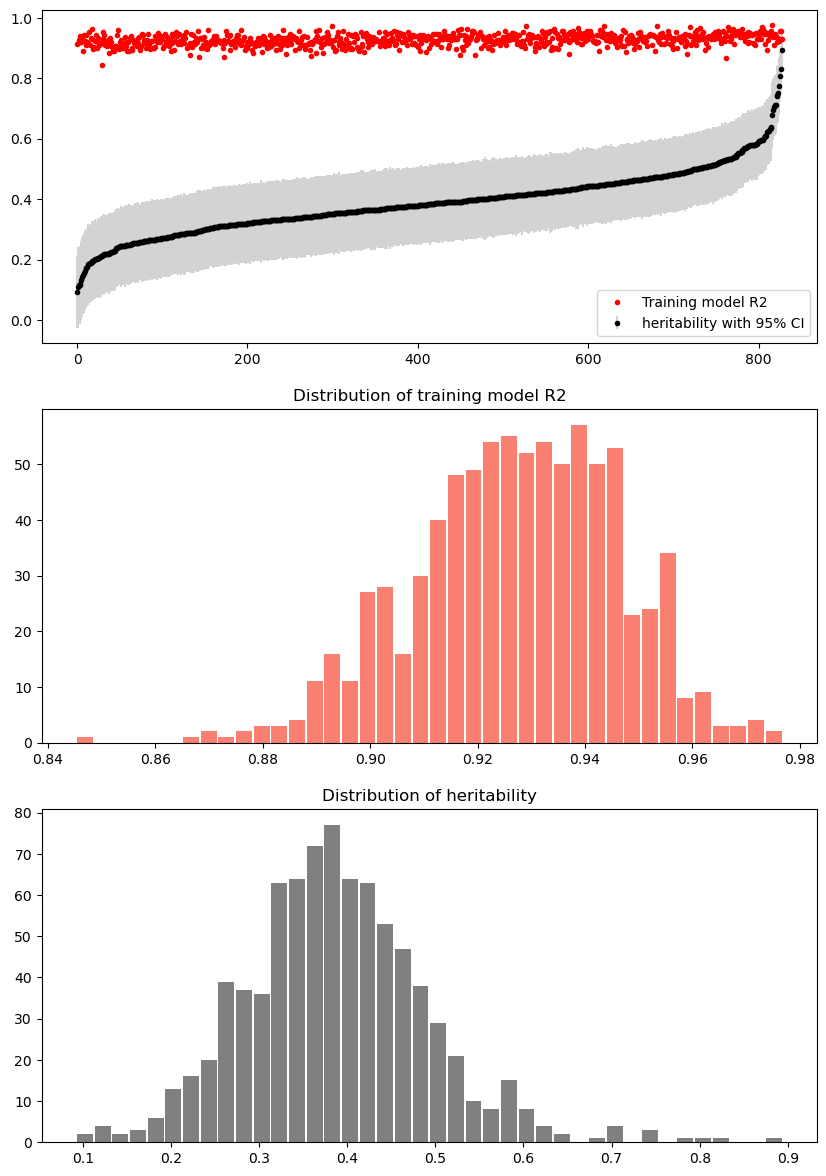

In [3]:
fn_heritability = '/data100t1/home/wanying/CCHC/lipidomics/output/heritability_by_GREML_species/heritability_species_class_mapped.txt'
# fn_r2 = '/data100t1/home/wanying/CCHC/lipidomics/prediction_models/elastic_net/training/model_params/all_coeff_r2.txt'
fn_r2 = '/data100t1/home/wanying/CCHC/lipidomics/prediction_models/elastic_net/training/model_params/lipid_species_l1_0.5_100_alpha_CV_All.txt'

df_heritability = pd.read_csv(fn_heritability, sep='\t')
df_r2 = pd.read_csv(fn_r2, sep='\t')
df_r2.drop_duplicates()

print(len(df_r2)) # Double check there is not issue when merging the files
df_r2.drop_duplicates(subset='lipid', inplace=True)
print(len(df_r2))

display(df_heritability.head())
display(df_r2.head())

df_merged = df_heritability[['lipid species', 'lipid class', 'heritability', 'SE']].merge(df_r2, left_on='lipid species', right_on='lipid')
df_merged.sort_values(by='heritability', inplace=True)
df_merged.reset_index(drop=True, inplace=True)
print(len(df_merged))

# calcualte 95% confidence interval
# "For normal distribution, a 95% confidence interval is obtained as the values 1.96×SE either side of the mean."
df_merged['95CI'] = 1.96*df_merged['SE']

fig, ax = plt.subplots(figsize=(10, 15), nrows=3, dpi=100)
ax[0].errorbar(df_merged.index, df_merged['heritability'], yerr=df_merged['95CI'],
               ls='', marker='.', color='k', ecolor='lightgrey', label='heritability with 95% CI')
ax[0].plot(df_merged.index, df_merged['best_r2'], ls='', marker='.', color='r', label='Training model R2')
ax[0].legend()

ax[1].hist(df_merged['best_r2'], bins=40, color='salmon', rwidth=0.9)
ax[1].set_title('Distribution of training model R2')

ax[2].hist(df_merged['heritability'], bins=40, color='grey', rwidth=0.9)
ax[2].set_title('Distribution of heritability')


### 2.2 Test set

In [4]:
fn_test_pred = '/data100t1/home/wanying/CCHC/lipidomics/prediction_models/elastic_net/test/pred_vals.txt'
fn_test_true = '/data100t1/home/wanying/CCHC/lipidomics/prediction_models/input_docs/lipid_traits_residuals/test/lipid_species_residuals_adj_for_sex_age_pc1-5.txt'
df_test_pred = pd.read_csv(fn_test_pred, sep='\t')
df_test_true = pd.read_csv(fn_test_true, sep='\t')
print('# Load predicted values and true values of test set:', df_test_pred.shape, df_test_true.shape)


df_id_mapping = pd.read_csv('/data100t1/home/wanying/CCHC/doc/samples_IDs/202211_merged_RNA_lipid_protein_genotype_mapping_and_availability.txt',
                            sep='\t').dropna(subset=['genotype_ID', 'lipidomic']).drop_duplicates(subset='lipidomic')[['genotype_ID', 'lipidomic']]
print('# Load ID mapping file:', df_id_mapping.shape)

print('#Rename columns in predicted dataframe, so that all IDs are LABIDs')
df_test_pred.rename(columns=df_id_mapping[['genotype_ID', 'lipidomic']].set_index(keys='genotype_ID').to_dict()['lipidomic'], inplace=True)

print('#Reformat dataframes for merging')
df_test_true_T = df_test_true.T.reset_index()
df_test_true_T.columns = ['LABID'] + list(df_test_true_T.iloc[0][1:])
df_test_true_T.drop(index=0, inplace=True)

df_test_pred_T = df_test_pred.T.reset_index()
df_test_pred_T.columns = ['LABID'] + list(df_test_pred_T.iloc[0][1:])
df_test_pred_T.drop(index=0, inplace=True)
df_merged = df_test_pred_T.merge(df_test_true_T, on='LABID', suffixes=['_pred','_true'])
print('#Final cleaned dataframe:', df_merged.shape)

print('#Calculate model fitting r2, pearson r2 and spearman r2')
model_fitting_r2 = [] # Test quality of model fitting
pearson_r2 = [] # Test pearson r2 for linear relationship
spearman_r2 = [] # Test monotonicity of the relationship. Non-parametric
for col in df_merged.iloc[:, 1:830]: # Use 1:830
    lipid = col.split('_pred')[0]
    model_fitting_r2.append(r2_score(df_merged[lipid+'_true'], df_merged[col]))
    # Note: scipy fucniton returns pearson r not r2!!!!!
    pearson_r2.append(stats.pearsonr(df_merged[lipid+'_true'], df_merged[col])[0]**2)
    spearman_r2.append(stats.spearmanr(df_merged[lipid+'_true'], df_merged[col])[0]**2)
        
print('#Merge performance metrics with heritabilities')
df_performance = pd.DataFrame({'lipid species':[val.split('_pred')[0] for val in df_merged.iloc[:, 1:830].columns],
                               'model_fitting_r2':model_fitting_r2, 'pearson_r2':pearson_r2, 'spearman_r2':spearman_r2})
df_r2_heritability_merged = df_performance.merge(df_heritability, on='lipid species').sort_values(by='heritability').reset_index(drop=True)

# Calcualte 95% CI
df_r2_heritability_merged['95CI'] = 1.96*df_r2_heritability_merged['SE']

# Load predicted values and true values of test set: (829, 683) (830, 681)
# Load ID mapping file: (2361, 2)
#Rename columns in predicted dataframe, so that all IDs are LABIDs
#Reformat dataframes for merging
#Final cleaned dataframe: (652, 1660)
#Calculate model fitting r2, pearson r2 and spearman r2
#Merge performance metrics with heritabilities


In [5]:
df_r2_heritability_merged.sort_values('pearson_r2')

,lipid species,model_fitting_r2,pearson_r2,spearman_r2,lipid class,lipid,heritability,SE,95CI
29,SM(d18:0/22:0),-0.065685,0.305854,0.284732,SM,SM-d18:0-22:0-,0.211456,0.062015,0.121549
136,Cer(d19:1/26:0),-0.680064,0.310341,0.294756,Cer(d),Cer-d19:1-26:0-,0.288182,0.066905,0.131134
6,AC(16:1)-OH,0.181991,0.323118,0.297014,AC-OH,AC-16:1--OH,0.140695,0.065890,0.129144
315,TG(50:1) [NL-18:1],0.185250,0.332452,0.263810,TG [NL],TG-50:1-_[NL-18:1],0.355550,0.065571,0.128519
11,SM(40:4),0.055975,0.335652,0.317021,SM,SM-40:4-,0.173006,0.062210,0.121932
...,...,...,...,...,...,...,...,...,...
746,PE(P-18:0/18:2),0.510687,0.551865,0.510137,PE(P),PE-P-18:0-18:2-,0.512500,0.064898,0.127200
774,LPC(16:0) [sn1],0.520808,0.556097,0.516082,LPC,LPC-16:0-_[sn1],0.545137,0.061170,0.119893
781,LPC(O-18:0),-0.256662,0.560544,0.506767,LPC(O),LPC-O-18:0-,0.562023,0.056187,0.110127
730,LPC(18:0) [sn2],0.473433,0.569918,0.521834,LPC,LPC-18:0-_[sn2],0.502182,0.063639,0.124732


In [6]:
df_r2_heritability_merged.sort_values('model_fitting_r2')

,lipid species,model_fitting_r2,pearson_r2,spearman_r2,lipid class,lipid,heritability,SE,95CI
816,PI(18:0_20:3) (a),-7.170062,0.573096,0.533615,PI,PI-18:0_20:3-_-a-,0.677737,0.055368,0.108521
425,HexCer(d18:1/16:0),-6.147404,0.447550,0.377819,HexCer,HexCer-d18:1-16:0-,0.387189,0.067796,0.132880
111,TG(O-50:2) [NL-18:2],-5.080979,0.408458,0.360555,TG(O) [NL],TG-O-50:2-_[NL-18:2],0.275597,0.064657,0.126728
750,PC(O-42:4) (b),-3.338914,0.424450,0.385336,PC(O),PC-O-42:4-_-b-,0.514761,0.060565,0.118707
580,TG(56:8) [NL-22:6],-3.210854,0.460023,0.432222,TG [NL],TG-56:8-_[NL-22:6],0.432640,0.062444,0.122390
...,...,...,...,...,...,...,...,...,...
787,PC(P-16:0/14:0),0.504577,0.528663,0.466743,PC(P),PC-P-16:0-14:0-,0.576158,0.058747,0.115144
746,PE(P-18:0/18:2),0.510687,0.551865,0.510137,PE(P),PE-P-18:0-18:2-,0.512500,0.064898,0.127200
821,PC(38:5) (a),0.512606,0.538316,0.515321,PC,PC-38:5-_-a-,0.742351,0.047944,0.093970
814,dimethyl-CE(20:4),0.518518,0.522793,0.513745,dimethyl-CE,dimethyl-CE-20:4-,0.634773,0.055402,0.108588


In [7]:
df_r2_heritability_merged.mean(axis=0).sort_values()

/tmp/ipykernel_208312/1573542116.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_r2_heritability_merged.mean(axis=0).sort_values()


model_fitting_r2   -0.073605
SE                  0.063850
95CI                0.125146
heritability        0.387978
spearman_r2         0.407119
pearson_r2          0.440273
dtype: float64

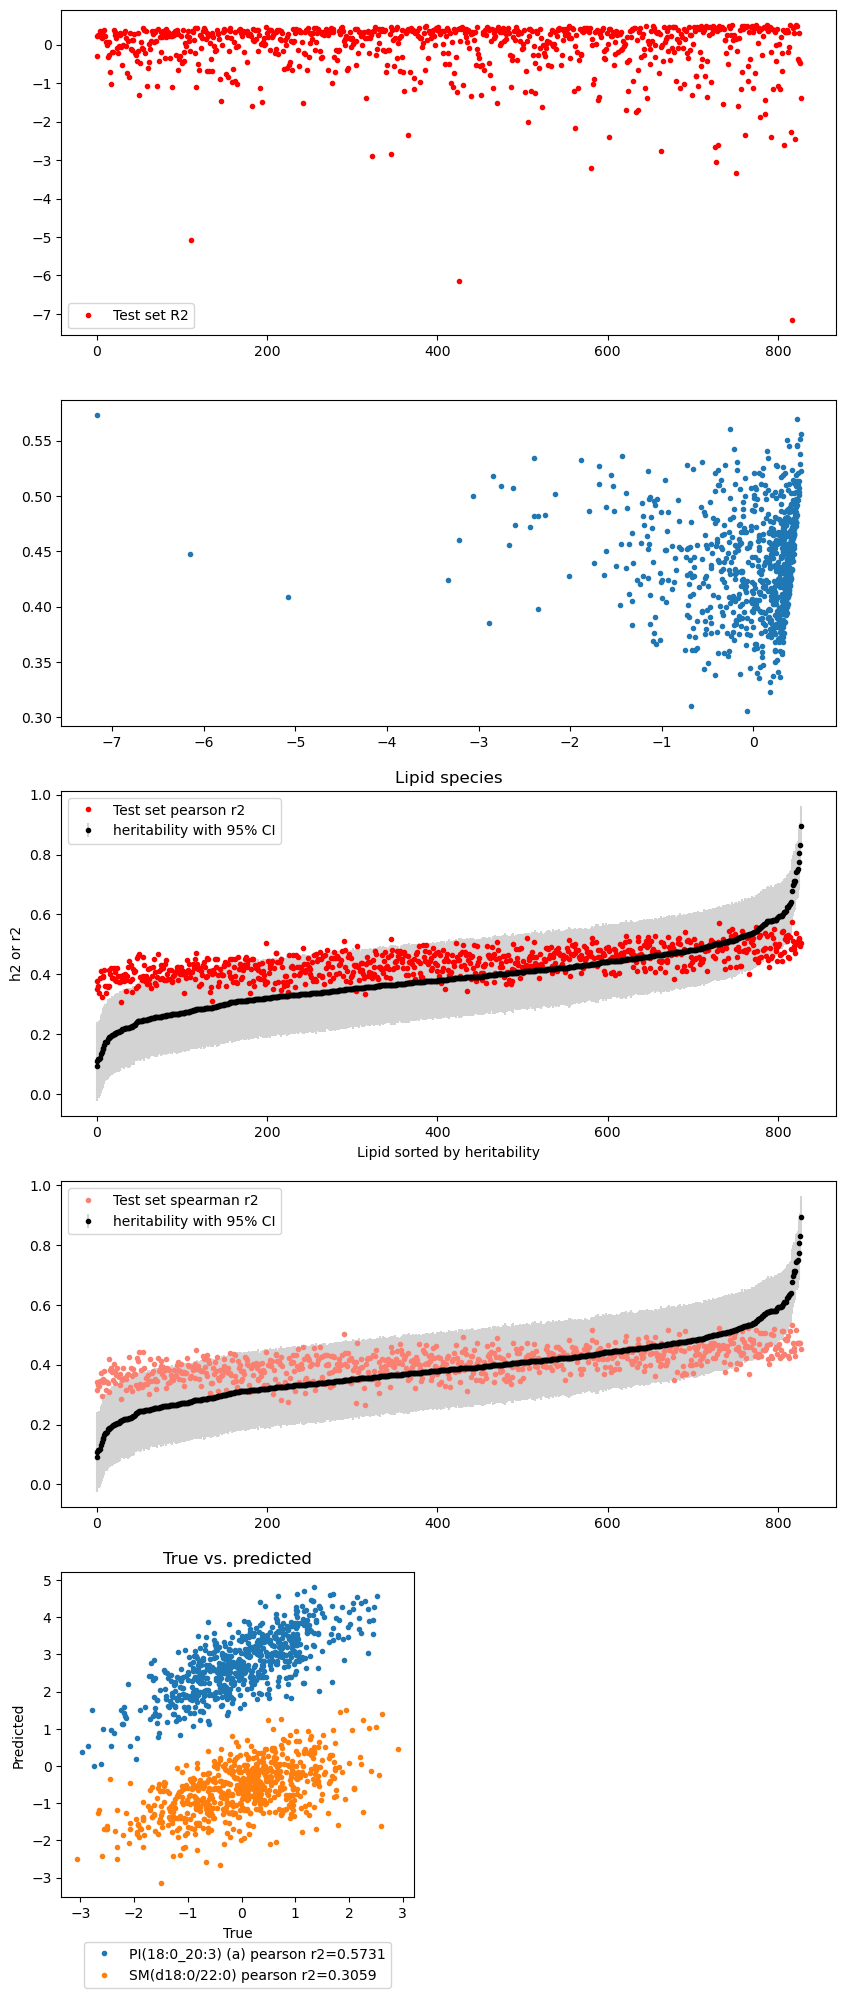

In [23]:
fig_test, ax_test = plt.subplots(dpi=100, figsize=(10, 25), nrows=5)
# ax_test[0].errorbar(df_r2_heritability_merged.index, df_r2_heritability_merged['heritability'], yerr=df_merged['95CI'],
#                ls='', marker='.', color='k', ecolor='lightgrey', label='heritability with 95% CI')
ax_test[0].plot(df_r2_heritability_merged.index, df_r2_heritability_merged['model_fitting_r2'],
                ls='', marker='.', color='r', label='Test set R2')
ax_test[0].legend()

ax_test[1].plot(df_r2_heritability_merged['model_fitting_r2'], df_r2_heritability_merged['pearson_r2'],
                ls='', marker='.')
# ax_test[1].plot(df_r2_heritability_merged[R2_mask]['model_fitting_r2'], df_r2_heritability_merged[R2_mask]['pearson_r2'],
#                 ls='', marker='.', label='R2 filtered')
# ax_test[1].legend()

ax_test[2].errorbar(df_r2_heritability_merged.index, df_r2_heritability_merged['heritability'], yerr=df_r2_heritability_merged['95CI'],
               ls='', marker='.', color='k', ecolor='lightgrey', label='heritability with 95% CI')
ax_test[2].plot(df_r2_heritability_merged.index, df_r2_heritability_merged['pearson_r2'],
                ls='', marker='.', color='r', label='Test set pearson r2')
ax_test[2].set_title('Lipid species')
ax_test[2].set_xlabel('Lipid sorted by heritability')
ax_test[2].set_ylabel('h2 or r2')
ax_test[2].legend()

ax_test[3].errorbar(df_r2_heritability_merged.index, df_r2_heritability_merged['heritability'], yerr=df_r2_heritability_merged['95CI'],
               ls='', marker='.', color='k', ecolor='lightgrey', label='heritability with 95% CI')
# ax_test[3].plot(df_r2_heritability_merged.index, df_r2_heritability_merged['pearson_r2'],
#                 ls='', marker='.', color='r', label='Test set pearson r2')
ax_test[3].plot(df_r2_heritability_merged.index, df_r2_heritability_merged['spearman_r2'],
                ls='', marker='.', color='salmon', label='Test set spearman r2')
ax_test[3].legend()


# mask1 = df_r2_heritability_merged[df_r2_heritability_merged['lipid species']=='PI(18:0_20:3) (a)']
# ax_test[4].plot(df_merged['PI(18:0_20:3) (a)_true'], df_merged['PI(18:0_20:3) (a)_pred'], ls='',
#                 marker='.', label=f'PI(18:0_20:3) (a) pearson r2={0.573096:.4f}')
# # ax_test[4].plot(df_merged['LPC(16:0) [sn1]_true'], df_merged['LPC(16:0) [sn1]_pred'], ls='', marker='.', label='LPC(16:0) [sn1]')
# ax_test[4].plot(df_merged['SM(d18:0/22:0)_true'], df_merged['SM(d18:0/22:0)_pred'], ls='',
#                 marker='.', label=f'SM(d18:0/22:0) pearson r2={0.305854:.4f}')
# ax_test[4].legend()

ax4 = plt.subplot(529)
ax4.plot(df_merged['PI(18:0_20:3) (a)_true'], df_merged['PI(18:0_20:3) (a)_pred'], ls='',
         marker='.', label=f'PI(18:0_20:3) (a) pearson r2={0.573096:.4f}')
ax4.plot(df_merged['SM(d18:0/22:0)_true'], df_merged['SM(d18:0/22:0)_pred'], ls='',
                marker='.', label=f'SM(d18:0/22:0) pearson r2={0.305854:.4f}')
ax4.set_title('True vs. predicted')
ax4.set_xlabel('True')
ax4.set_ylabel('Predicted')

ax4.legend(loc='lower center', bbox_to_anchor=(0.5,-0.3))

fig.tight_layout()

## 3. Model complexity (EN, lasso, prs regression)
Check number of SNPs used in each model

### 3.1 Get number of SNPs used in each model

In [211]:
def get_number_of_snps(fn, model):
    '''
    Get numbers of SNPs used in the EN or lasso model for each lipid as a dataframe
    Params:
    - fn: file name of the model parameters
    - model: type of the model (elastic net or lasso)
    '''
    total_number_lines = 0 # Total number of lines of the input file
    with open(fn) as fh:
        line = fh.readline()
        line = fh.readline().strip()
        while line != '':
            total_number_lines += 1
            line = fh.readline().strip()
            
    lst_lipid, lst_counts, cur_line = [], [], 0
    with open(fn) as fh:
        line = fh.readline()
        line = fh.readline().strip()
        while line != '':
            cur_line += 1
            count = 0
            lipid, _, _ , _, betas, _ = line.split('\t')
            lst_lipid.append(lipid)
            for val in betas.split(','):
                if float(val) !=0:
                    count += 1
            lst_counts.append(count)
            line = fh.readline().strip()
            print(f'\r# Process line {cur_line}/{total_number_lines}   ', end='', flush=True)
        return pd.DataFrame({'lipid':lst_lipid, 'n_snps':lst_counts, 'model':[model for x in range(len(lst_counts))]})

    
def get_number_of_snps_gwas_output(path, threshold):
    '''
    Get nubmer of SNPs used in PRS regression models
    Paramas:
    - path: directory to filtered SNP files
    '''
    lst_lipid, lst_counts, count = [], [], 0
    
    for fn in os.listdir(path):
        if fn.endswith('_SNPs_pval_0.001.txt'):
            lipid = fn.split('_SNPs_pval_0.001.txt')[0]
            lst_lipid.append(lipid)
            df = pd.read_csv(os.path.join(path, fn), sep='\t')
            mask = df['P']<=threshold
            lst_counts.append(len(df[mask]))
            count += 1
            print(f'\r# Processing {count}        ', end='', flush=True)
    return pd.DataFrame({'lipid':lst_lipid, 'n_snps':lst_counts, 'model':['prs_'+str(threshold) for x in range(len(lst_counts))]})

In [253]:
# Parameters of each model
elastic_net_fn = '/data100t1/home/wanying/CCHC/lipidomics/prediction_models/elastic_net/training/model_params/all_liplid_species_elastic_net_params.txt'
lasso_fn = '/data100t1/home/wanying/CCHC/lipidomics/prediction_models/lasso/training/all_liplid_lasso_params.txt'
# single_snp_prs_dir = ''
threshold = 1e-4
multiple_snp_prs_dir = '/data100t1/home/wanying/CCHC/lipidomics/output/traininig_set_lipid_species_GWAS/adj_for_sex_age_pval_1e-3/'

df_en = get_number_of_snps(elastic_net_fn, 'elastic net')
df_lasso = get_number_of_snps(lasso_fn, 'lasso')
df_multiple_snps_prs = get_number_of_snps_gwas_output(multiple_snp_prs_dir, threshold)

# Merge number of SNPs from each model togetherL
df_en['lipid_name'] = df_en['lipid'].apply(lambda x: x.replace('(', '-').replace(')', '-').replace('/', '-').replace(' ', '_'))
df_lasso['lipid_name'] = df_lasso['lipid'].apply(lambda x: x.replace('(', '-').replace(')', '-').replace('/', '-').replace(' ', '_'))
df_multiple_snps_prs.rename(columns={'lipid':'lipid_name'}, inplace=True)

cols = ['lipid', 'lipid_name', 'n_snps']
df_merged_n_snps = df_en[cols].merge(df_lasso[cols], on=['lipid', 'lipid_name'], suffixes=('_EN', '_lasso'))
df_merged_n_snps = df_merged_n_snps.merge(df_multiple_snps_prs[['lipid_name', 'n_snps']],
                                          on='lipid_name').rename(columns={'n_snps':'n_snps_prs_0.0001'})

df_merged_n_snps.sort_values(by='n_snps_prs_0.0001', inplace=True)

'''
# Save to output
df_merged_n_snps.to_csv('/data100t1/home/wanying/CCHC/lipidomics/prediction_models/summary_files/model_complexity_n_snps.txt',
                        sep='\t', index=False)

'''
df_merged_n_snps.head()

# Processing 830         

,lipid,lipid_name,n_snps_EN,n_snps_lasso,n_snps_prs_0.0001
38,DG(16:0_22:6),DG-16:0_22:6-,919,779,1677
512,TG(50:0) [NL-18:0],TG-50:0-_[NL-18:0],985,816,1798
720,AC(22:6),AC-22:6-,952,753,1799
91,TG(52:2) [NL-18:2],TG-52:2-_[NL-18:2],952,752,1826
655,DG(18:0_18:2),DG-18:0_18:2-,996,831,1844


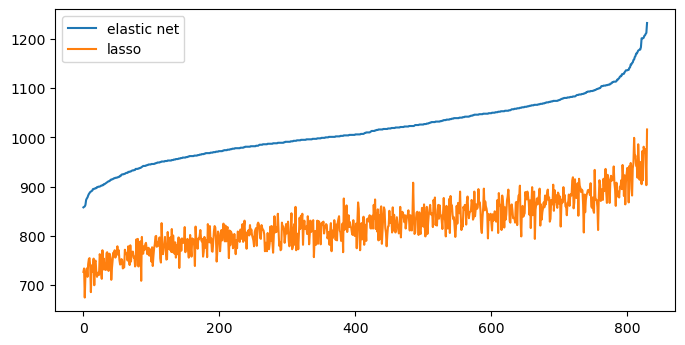

In [254]:
df_merged_n_snps.sort_values(by='n_snps_EN', inplace=True)
fig_n_snps, ax_n_snps = plt.subplots(figsize=(8, 4), dpi=100)
# ax_n_snps.plot([x for x in range(len(df_merged_n_snps))], df_merged_n_snps['n_snps_prs_0.0001'],
#                ls='-', label='')
ax_n_snps.plot([x for x in range(len(df_merged_n_snps))], df_merged_n_snps['n_snps_EN'],
               ls='-', label='elastic net')
ax_n_snps.plot([x for x in range(len(df_merged_n_snps))], df_merged_n_snps['n_snps_lasso'],
               ls='-', label='lasso')
ax_n_snps.legend()

### 3.2 Merge with (training set) heritability to see if there is any pattern

In [250]:
# Load heritability of all sample (~2200) vs training set (~1600)
print('#Load heritability of all samples and training set')
heritability_dir = '/data100t1/home/wanying/CCHC/lipidomics/output/traininig_set_lipid_species_GWAS/heritability_by_GREML_species'
fn_heritability = 'heritability_species_class_mapped_all_vs_unrel.txt'
df_heritability_all = pd.read_csv(f'{heritability_dir}/{fn_heritability}', sep='\t')
df_heritability_all.sort_values(by='heritability_unrelated', ascending=False, inplace=True)
display(df_heritability_all.head(2))

#Load heritability of all samples and training set


,lipid_species,lipid_class,lipid_name,heritability_all,SE_all,heritability_unrelated,SE_unrelated
0,CE(20:4),CE,CE-20:4-,0.893879,0.035484,0.997111,0.184409
2,CE(20:5),CE,CE-20:5-,0.806171,0.042057,0.911957,0.190165


In [255]:
df_merged_n_snps

,lipid,lipid_name,n_snps_EN,n_snps_lasso,n_snps_prs_0.0001
738,PE(O-38:5) (b),PE-O-38:5-_-b-,858,727,12625
33,DG(16:0_16:1),DG-16:0_16:1-,859,734,2435
126,SM(41:0),SM-41:0-,860,675,9827
797,Cer(d19:1/22:0),Cer-d19:1-22:0-,863,720,14437
223,LPE(P-18:0),LPE-P-18:0-,873,727,9130
...,...,...,...,...,...
365,methyl-CE(22:6),methyl-CE-22:6-,1206,975,3244
321,PC(38:6) (a),PC-38:6-_-a-,1207,976,6144
324,PC(39:5) (b),PC-39:5-_-b-,1210,966,8482
793,Cer(d18:2/24:1),Cer-d18:2-24:1-,1212,903,2772


In [259]:
# Merge with heritability
cols_h2 = ['lipid_name', 'lipid_class', 'heritability_unrelated', 'SE_unrelated']
df_merged_n_snps_h2 = df_merged_n_snps.merge(df_heritability_all[cols_h2], on='lipid_name')
df_merged_n_snps_h2.sort_values(by='heritability_unrelated', inplace=True)
df_merged_n_snps_h2.head(5)

,lipid,lipid_name,n_snps_EN,n_snps_lasso,n_snps_prs_0.0001,lipid_class,heritability_unrelated,SE_unrelated
0,PE(O-38:5) (b),PE-O-38:5-_-b-,858,727,12625,PE(O),0.000001,0.188636
166,TG(50:2) [NL-16:1],TG-50:2-_[NL-16:1],963,790,2248,TG [NL],0.000001,0.186691
167,PE(O-16:0/22:6),PE-O-16:0-22:6-,963,794,2561,PE(O),0.000001,0.190970
406,PC(33:2),PC-33:2-,1006,798,2376,PC,0.000001,0.183021
756,LPC(17:1) [sn1] (a) / LPC(17:1) [sn2] (b),LPC-17:1-_[sn1]_-a-_-_LPC-17:1-_[sn2]_-b-,1098,859,3448,LPC,0.000001,0.182364
...,...,...,...,...,...,...,...,...
742,PC(16:0_20:4),PC-16:0_20:4-,1093,893,14543,PC,0.874927,0.179579
296,DE(20:4),DE-20:4-,990,786,7129,DE,0.893228,0.191189
675,PC(18:0_20:4),PC-18:0_20:4-,1068,848,15997,PC,0.903040,0.180109
829,CE(20:5),CE-20:5-,1232,1016,9579,CE,0.911957,0.190165


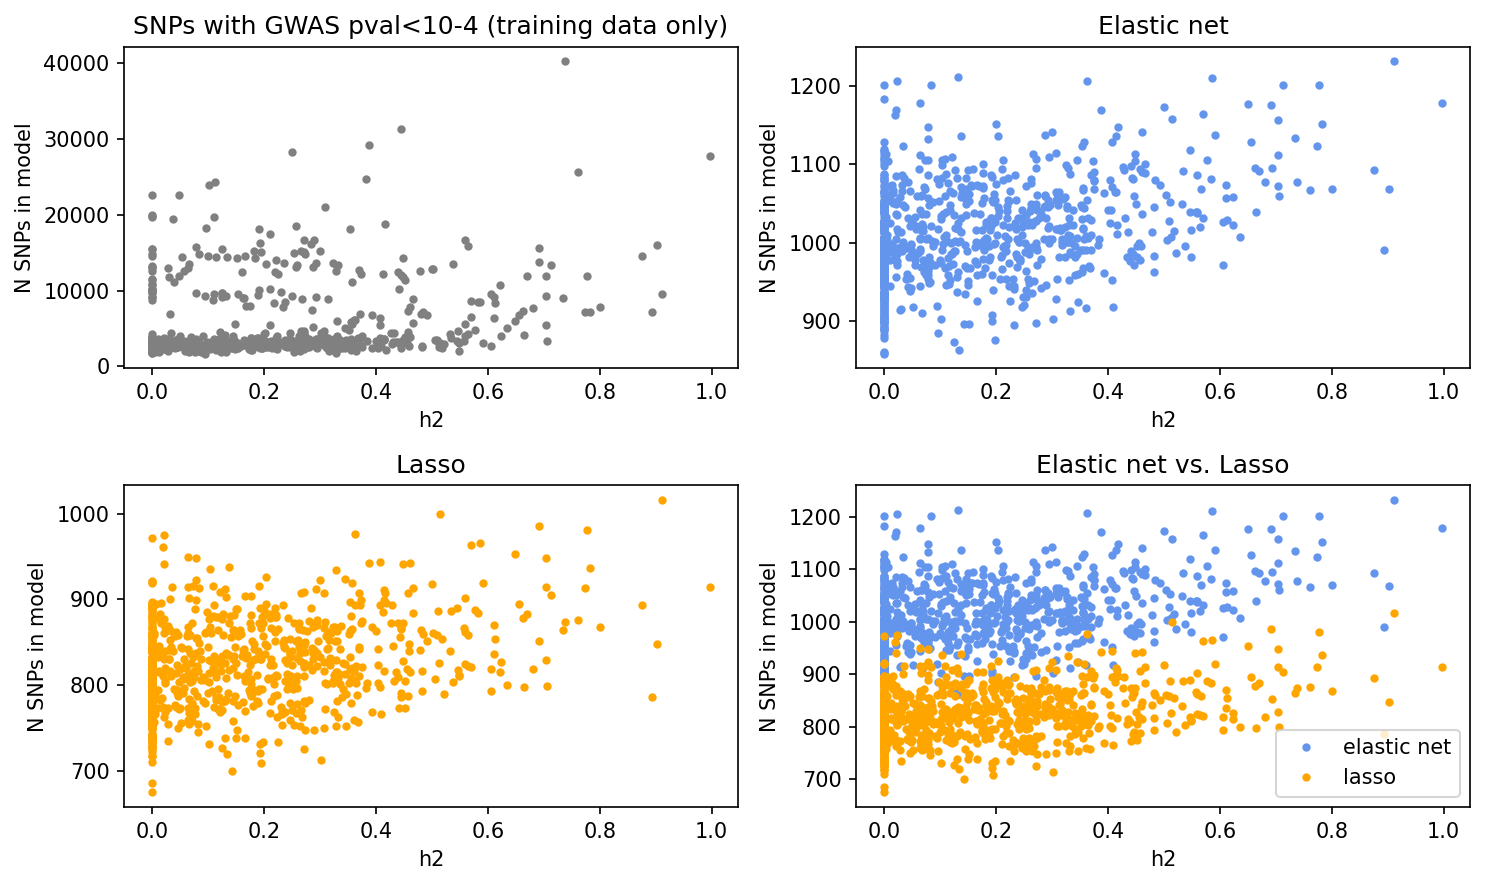

In [277]:
fig_h2_n_snps, ax_h2_n_snps = plt.subplots(dpi=150, figsize=(10, 6), nrows=2, ncols=2)

ax_h2_n_snps[0, 0].plot(df_merged_n_snps_h2['heritability_unrelated'],
                        df_merged_n_snps_h2['n_snps_prs_0.0001'], ls='', marker='.', c='grey')
ax_h2_n_snps[0, 0].set_xlabel('h2')
ax_h2_n_snps[0, 0].set_ylabel('N SNPs in model')
ax_h2_n_snps[0, 0].set_title('SNPs with GWAS pval<10-4 (training data only)')

ax_h2_n_snps[0, 1].plot(df_merged_n_snps_h2['heritability_unrelated'],
                        df_merged_n_snps_h2['n_snps_EN'], ls='', marker='.', c='cornflowerblue')
ax_h2_n_snps[0, 1].set_xlabel('h2')
ax_h2_n_snps[0, 1].set_ylabel('N SNPs in model')
ax_h2_n_snps[0, 1].set_title('Elastic net')

ax_h2_n_snps[1, 0].plot(df_merged_n_snps_h2['heritability_unrelated'],
                        df_merged_n_snps_h2['n_snps_lasso'], ls='', marker='.', c='orange')
ax_h2_n_snps[1, 0].set_xlabel('h2')
ax_h2_n_snps[1, 0].set_ylabel('N SNPs in model')
ax_h2_n_snps[1, 0].set_title('Lasso')


# ax_h2_n_snps[1, 1].plot(df_merged_n_snps_h2['heritability_unrelated'],
#                         df_merged_n_snps_h2['n_snps_prs_0.0001'], ls='', marker='.')
ax_h2_n_snps[1, 1].plot(df_merged_n_snps_h2['heritability_unrelated'],
                        df_merged_n_snps_h2['n_snps_EN'], ls='',
                        marker='.', label='elastic net', c='cornflowerblue')
ax_h2_n_snps[1, 1].plot(df_merged_n_snps_h2['heritability_unrelated'],
                        df_merged_n_snps_h2['n_snps_lasso'], ls='',
                        marker='.', label='lasso', c='orange')
ax_h2_n_snps[1, 1].set_xlabel('h2')
ax_h2_n_snps[1, 1].set_ylabel('N SNPs in model')
ax_h2_n_snps[1, 1].legend()
ax_h2_n_snps[1, 1].set_title('Elastic net vs. Lasso')


fig_h2_n_snps.tight_layout()

## 4. (2023/06) Redo GWAS, heritability and model training in the training set only

### 4.1 Heritability from the training set (max unrelated set)

In [16]:
'''# Merge heritabilities of all lipid species
heritability_dir = '/data100t1/home/wanying/CCHC/lipidomics/output/traininig_set_lipid_species_GWAS/heritability_by_GREML_species'
output_fn = 'heritability_all.txt'
fh_output = open(f'{heritability_dir}/{output_fn}', 'w')
fh_output.write('Lipid\tType\tVariance\tSE\n')

for fn in os.listdir(heritability_dir):
    if fn.endswith('hsq'):
        lipid = fn.split('.hsq')[0]
        with open(f'{heritability_dir}/{fn}') as fh:
            line = fh.readline().strip()
            while line != '':
                if line.startswith('V(G)/Vp'):
                    _, variance, se = line.split()
                    # print(f'{lipid}\tspecies\t{variance}\t{se}')
                    fh_output.write(f'{lipid}\tspecies\t{variance}\t{se}\n')
                line = fh.readline().strip()
fh_output.close()'''

In [2]:
# Plot heritability of all sample (~2200) vs training set (~1600)
print('#Load heritability of all samples and training set')
heritability_dir = '/data100t1/home/wanying/CCHC/lipidomics/output/traininig_set_lipid_species_GWAS/heritability_by_GREML_species'
fn_heritability = 'heritability_species_class_mapped_all_vs_unrel.txt'
df_heritability_all = pd.read_csv(f'{heritability_dir}/{fn_heritability}', sep='\t')
df_heritability_all.sort_values(by='heritability_unrelated', ascending=False, inplace=True)
display(df_heritability_all.head(2))


#Load heritability of all samples and training set


,lipid_species,lipid_class,lipid_name,heritability_all,SE_all,heritability_unrelated,SE_unrelated
0,CE(20:4),CE,CE-20:4-,0.893879,0.035484,0.997111,0.184409
2,CE(20:5),CE,CE-20:5-,0.806171,0.042057,0.911957,0.190165


In [26]:
df_heritability_all[df_heritability_all['lipid_species']=='PC(34:2) [+OH]']

,lipid_species,lipid_class,lipid_name,heritability_all,SE_all,heritability_unrelated,SE_unrelated
829,PC(34:2) [+OH],OxSpecies,PC-34:2-_[+OH],0.09257,0.060289,0.066801,0.190704


In [9]:
df_heritability_all

,lipid_species,lipid_class,lipid_name,heritability_all,SE_all,heritability_unrelated,SE_unrelated
0,CE(20:4),CE,CE-20:4-,0.893879,0.035484,0.997111,0.184409
2,CE(20:5),CE,CE-20:5-,0.806171,0.042057,0.911957,0.190165
5,PC(18:0_20:4),PC,PC-18:0_20:4-,0.745127,0.048278,0.903040,0.180109
7,DE(20:4),DE,DE-20:4-,0.713117,0.050106,0.893228,0.191189
1,PC(16:0_20:4),PC,PC-16:0_20:4-,0.831594,0.038231,0.874927,0.179579
...,...,...,...,...,...,...,...
625,AC(15:0) (a),AC,AC-15:0-_-a-,0.320527,0.065498,0.000001,0.191659
372,PC(15-MHDA_18:1),PC,PC-15-MHDA_18:1-,0.394518,0.061636,0.000001,0.184744
627,TG(48:2) [NL-14:1],TG [NL],TG-48:2-_[NL-14:1],0.319779,0.067615,0.000001,0.190040
629,TG(48:1) [SIM],TG(SIM),TG-48:1-_[SIM],0.319107,0.067562,0.000001,0.189156


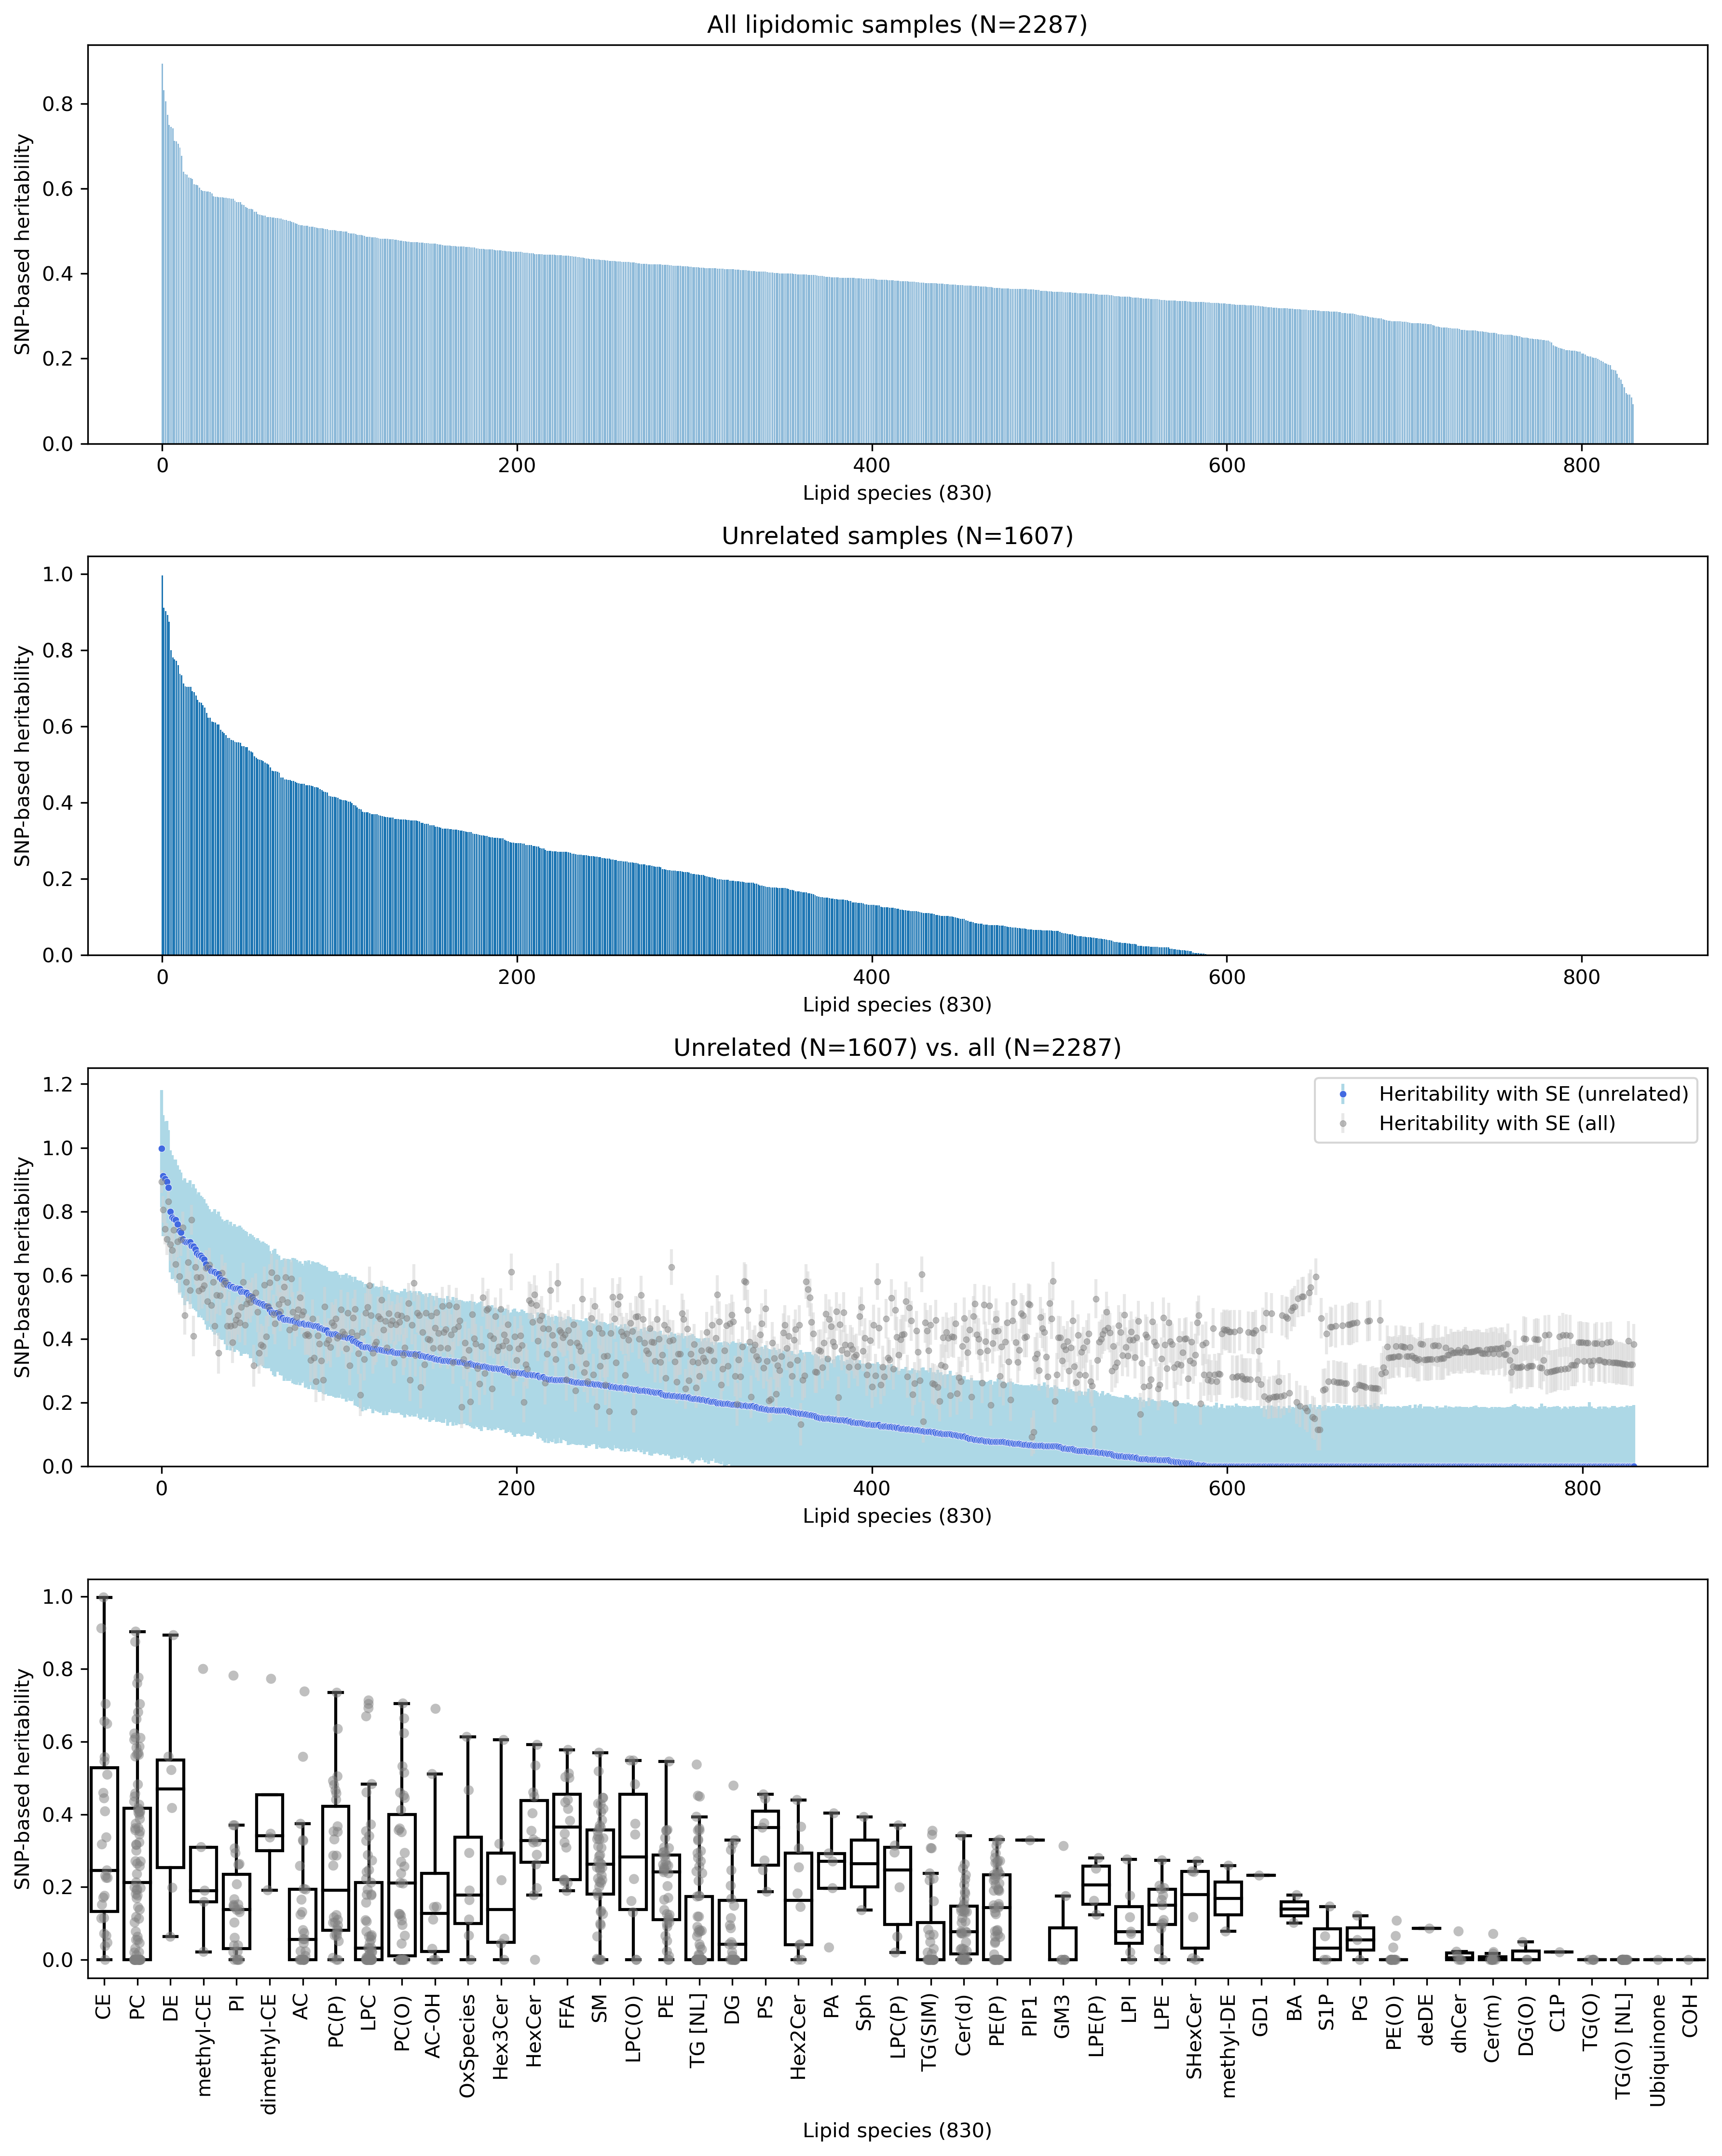

In [3]:
fig_h, ax_h  = plt.subplots(nrows=4, ncols=1, dpi=300, figsize=(12, 15))
ax_h[0].bar([x for x in range(len(df_heritability_all))],
            df_heritability_all.sort_values('heritability_all', ascending=False)['heritability_all'],
            alpha=0.5)
ax_h[0].set_xlabel('Lipid species (830)')
ax_h[0].set_ylabel('SNP-based heritability')
ax_h[0].set_title('All lipidomic samples (N=2287)')
ax_h[1].bar([x for x in range(len(df_heritability_all))], df_heritability_all['heritability_unrelated'])
ax_h[1].set_xlabel('Lipid species (830)')
ax_h[1].set_ylabel('SNP-based heritability')
ax_h[1].set_title('Unrelated samples (N=1607)')

ax_h[2].errorbar([x for x in range(len(df_heritability_all))],
                 df_heritability_all['heritability_unrelated'],
                 yerr=df_heritability_all['SE_unrelated'], ls='', marker='.', markersize=7, color='royalblue', ecolor='lightblue',
                 markeredgecolor='w', markeredgewidth=0.2, label='Heritability with SE (unrelated)')
ax_h[2].errorbar([x for x in range(len(df_heritability_all))],
                 df_heritability_all['heritability_all'],
                 yerr=df_heritability_all['SE_all'], ls='', marker='.', color='grey', ecolor='lightgrey',
                 markeredgewidth=0.3, alpha=0.5, label='Heritability with SE (all)')
ax_h[2].set_xlabel('Lipid species (830)')
ax_h[2].set_ylabel('SNP-based heritability')
ax_h[2].set_title('Unrelated (N=1607) vs. all (N=2287)')
ax_h[2].set_ylim(bottom=0)
ax_h[2].legend()


sns.boxplot(data=df_heritability_all, x='lipid_class', y='heritability_unrelated',
            color='w', ax=ax_h[3], boxprops={'edgecolor':'k'}, medianprops={'color':'k'},
            whiskerprops={'color':'k'}, capprops={'color':'k'}, showfliers = False)
sns.stripplot(data=df_heritability_all, x='lipid_class', y='heritability_unrelated',
              color='grey', alpha=0.5, ax=ax_h[3])
ax_h[3].set_xlabel('Lipid species (830)')
ax_h[3].set_ylabel('SNP-based heritability')
ax_h[3].set_xticklabels(ax_h[3].get_xticklabels(), rotation=90)

fig_h.tight_layout()

### 4.2 Calcualte and plot model performance on test set


In [63]:
# Load data
print('#Load ID mapping file')
fn_id_mapping = '/data100t1/home/wanying/CCHC/doc/samples_IDs/202211_merged_RNA_lipid_protein_genotype_mapping_and_availability.txt'
df_id_mapping = pd.read_csv(fn_id_mapping, sep='\t').dropna(subset='lipidomic')
id_mapping = df_id_mapping[['genotype_ID', 'lipidomic']].set_index('genotype_ID').to_dict()['lipidomic']

print('#Load predicted values on test set')
fn_pred_test = '/data100t1/home/wanying/CCHC/lipidomics/prediction_models/elastic_net/test/test_pred_vals.txt'
df_pred = pd.read_csv(fn_pred_test, sep='\t').rename(columns=id_mapping).T.reset_index()
df_pred.columns = ['LABID'] + list(df_pred.iloc[0, 1:])
df_pred.drop(index=0, inplace=True)
display(df_pred.head(2))

print('#Load true values of test set')
fn_obs_test = '/data100t1/home/wanying/CCHC/lipidomics/prediction_models/input_docs/lipid_traits_residuals/test/lipid_species_residuals_adj_for_sex_age_pc1-5.txt'
df_obs = pd.read_csv(fn_obs_test, sep='\t').T.reset_index()
df_obs.columns = ['LABID'] + list(df_obs.iloc[0, 1:])
df_obs.drop(index=0, inplace=True)
display(df_obs.head(2))

#Load ID mapping file
#Load predicted values on test set


,LABID,Sph(d18:1),Sph(d18:2),S1P(d16:1),S1P(d18:0),S1P(d18:1),S1P(d18:2),dhCer(d18:0/16:0),dhCer(d18:0/18:0),dhCer(d18:0/20:0),...,TG(O-54:4) [NL-18:2],Ubiquinone,CE(18:2) [+OH],CE(20:4) [+OH],LPC(18:2) [+OH],LPC(20:4) [+OH],LPC(22:6) [+OH],PC(34:2) [+OH],PC(36:4) [+OH],PC(38:6) [+OH]
1,10Y0021,0.072629,1.189218,1.882139,0.635631,-0.041897,0.436683,-0.331287,-0.388517,0.195458,...,0.211347,-1.364896,-1.194326,0.211807,-0.534841,0.101866,-0.208678,-0.47099,0.534327,-0.664965
2,10Y0381,-0.367853,0.969223,0.961438,0.650948,-1.029297,-0.052659,0.041459,-0.877611,0.182373,...,0.61896,-0.479641,0.553892,-0.313452,-0.631395,-1.112363,-0.688386,0.292377,-0.125266,-0.270327


#Load true values of test set


,LABID,Sph(d18:1),Sph(d18:2),S1P(d16:1),S1P(d18:0),S1P(d18:1),S1P(d18:2),dhCer(d18:0/16:0),dhCer(d18:0/18:0),dhCer(d18:0/20:0),...,TG(O-54:4) [NL-18:2],Ubiquinone,CE(18:2) [+OH],CE(20:4) [+OH],LPC(18:2) [+OH],LPC(20:4) [+OH],LPC(22:6) [+OH],PC(34:2) [+OH],PC(36:4) [+OH],PC(38:6) [+OH]
1,10Y0021,-0.16291,-0.942903,-1.151542,-0.274446,-1.367009,-1.618647,-0.658969,-0.834448,-0.33319,...,-0.495799,-1.205354,-0.167414,-1.076788,-1.30392,-1.151843,-0.904325,-0.791894,-1.058619,-0.50957
2,10Y0381,-0.529891,-0.187996,0.303026,-1.409466,-1.293871,-0.935225,0.985213,0.137695,0.365254,...,0.861963,0.111629,0.922712,-0.496905,-0.077265,0.096307,0.225141,-0.258755,0.810306,0.980918


In [64]:
# Calculate pearson r2 of pred and observed
df_merged = df_obs.merge(df_pred, on='LABID', suffixes=('_true', '_pred'))

pearson_r2, spearman_r2 = [], []
for lipid in df_obs.columns[1:]:
    pearson_r2.append(stats.pearsonr(df_merged[lipid+'_pred'], df_merged[lipid+'_true'])[0]**2)
    spearman_r2.append(stats.spearmanr(df_merged[lipid+'_pred'], df_merged[lipid+'_true'])[0]**2)
        
df_performance = pd.DataFrame(data=df_obs.columns[1:], columns=['lipid_species'])
df_performance['pearson_r2'] = pearson_r2
df_performance['spearman_r2'] = spearman_r2

cols = ['lipid_species', 'lipid_class', 'heritability_unrelated', 'SE_unrelated']
df_performance_heritability = df_performance.merge(df_heritability_all, on='lipid_species')
df_performance_heritability.sort_values(by='heritability_unrelated', inplace=True)
df_performance_heritability['95CI'] = 1.96*df_performance_heritability['SE_unrelated']
df_performance_heritability.reset_index(drop=True, inplace=True)
display(df_performance_heritability.head(2))

,lipid_species,pearson_r2,spearman_r2,lipid_class,lipid_name,heritability_all,SE_all,heritability_unrelated,SE_unrelated,95CI
0,PE(P-15:0/20:4) (b),0.124040,0.111769,PE(P),PE-P-15:0-20:4-_-b-,0.245407,0.065371,0.000001,0.187843,0.368172
1,PE(P-18:0/22:5) (n6),0.190862,0.174768,PE(P),PE-P-18:0-22:5-_-n6-,0.445517,0.063887,0.000001,0.190773,0.373915


Text(0, 0.5, 'Pearson r2')

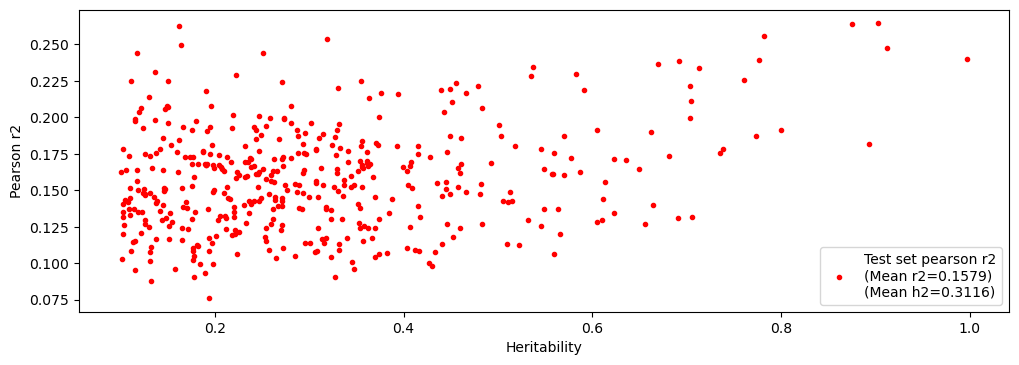

In [69]:
fig, ax = plt.subplots(dpi=100, figsize=(12, 4))
threshold=0.1
mask = df_performance_heritability['heritability_unrelated']>threshold
ax.plot(df_performance_heritability[mask]['heritability_unrelated'],
        df_performance_heritability[mask]['pearson_r2'],
        ls='', marker='.', color='r',
        label=f'Test set pearson r2\n(Mean r2={df_performance_heritability[mask]["pearson_r2"].mean():.4f})\n(Mean h2={df_performance_heritability[mask]["heritability_unrelated"].mean():.4f})')
ax.legend()
ax.set_xlabel('Heritability')
ax.set_ylabel('Pearson r2')

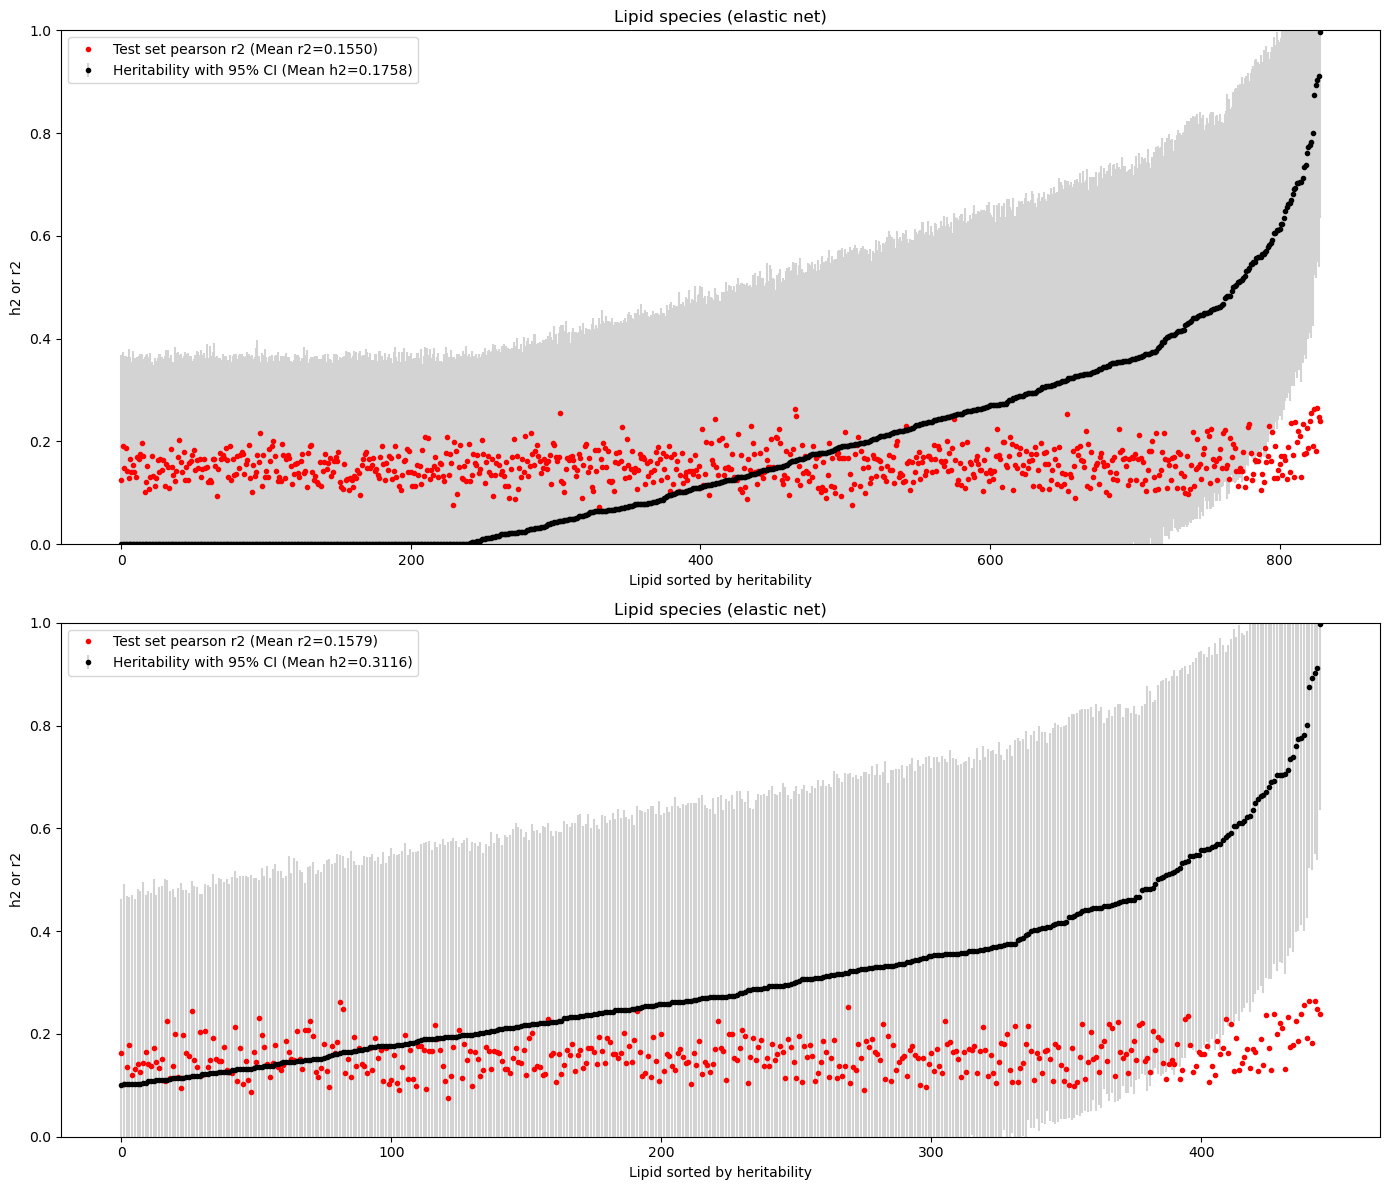

In [70]:
fig_test, ax_test = plt.subplots(dpi=100, figsize=(14, 12), nrows=2)
threshold=0.1
mask = df_performance_heritability['heritability_unrelated']>threshold
ax_test[0].errorbar(df_performance_heritability.index, df_performance_heritability['heritability_unrelated'],
                 yerr=df_performance_heritability['95CI'], ls='', marker='.', color='k', ecolor='lightgrey',
                 label=f'Heritability with 95% CI (Mean h2={df_performance_heritability["heritability_unrelated"].mean():.4f})')
ax_test[0].plot(df_performance_heritability.index, df_performance_heritability['pearson_r2'],
             ls='', marker='.', color='r', label=f'Test set pearson r2 (Mean r2={df_performance_heritability["pearson_r2"].mean():.4f})')
ax_test[0].set_ylim(bottom=0, top=1)
ax_test[0].set_title('Lipid species (elastic net)')
ax_test[0].set_xlabel('Lipid sorted by heritability')
ax_test[0].set_ylabel('h2 or r2')
ax_test[0].legend()

ax_test[1].errorbar([x for x in range(len(df_performance_heritability[mask]))],
                 df_performance_heritability[mask]['heritability_unrelated'],
                 yerr=df_performance_heritability[mask]['95CI'],
                 ls='', marker='.', color='k', ecolor='lightgrey',
                 label=f'Heritability with 95% CI (Mean h2={df_performance_heritability[mask]["heritability_unrelated"].mean():.4f})')
ax_test[1].plot([x for x in range(len(df_performance_heritability[mask]))],
             df_performance_heritability[mask]['pearson_r2'],
             ls='', marker='.', color='r', label=f'Test set pearson r2 (Mean r2={df_performance_heritability[mask]["pearson_r2"].mean():.4f})')

ax_test[1].set_ylim(bottom=0, top=1)
ax_test[1].set_title('Lipid species (elastic net)')
ax_test[1].set_xlabel('Lipid sorted by heritability')
ax_test[1].set_ylabel('h2 or r2')
ax_test[1].legend()

fig_test.tight_layout()

In [40]:
print('# Heritability<=0.2:',
      len(df_performance_heritability[df_performance_heritability['heritability_unrelated']<=0.2]),
      df_performance_heritability[df_performance_heritability['heritability_unrelated']<=0.2]['pearson_r2'].mean())
print('# Heritability>0.2:',
      len(df_performance_heritability[df_performance_heritability['heritability_unrelated']>0.2]),
      df_performance_heritability[df_performance_heritability['heritability_unrelated']>0.2]['pearson_r2'].mean())
print('# Heritability>0.3:',
      len(df_performance_heritability[df_performance_heritability['heritability_unrelated']>0.3]),
      df_performance_heritability[df_performance_heritability['heritability_unrelated']>0.3]['pearson_r2'].mean())
print('# Heritability>0.4:',
      len(df_performance_heritability[df_performance_heritability['heritability_unrelated']>0.4]),
      len(df_performance_heritability[df_performance_heritability['heritability_unrelated']>0.4]),
      df_performance_heritability[df_performance_heritability['heritability_unrelated']>0.4]['pearson_r2'].mean())
print('# Heritability>0.5:',
      len(df_performance_heritability[df_performance_heritability['heritability_unrelated']>0.5]),
      df_performance_heritability[df_performance_heritability['heritability_unrelated']>0.5]['pearson_r2'].mean())
print('# Heritability>0.6:',
      len(df_performance_heritability[df_performance_heritability['heritability_unrelated']>0.6]),
      df_performance_heritability[df_performance_heritability['heritability_unrelated']>0.6]['pearson_r2'].mean())
print('# Heritability>0.7:',
      len(df_performance_heritability[df_performance_heritability['heritability_unrelated']>0.7]),
      df_performance_heritability[df_performance_heritability['heritability_unrelated']>0.7]['pearson_r2'].mean())

# Heritability<=0.2: 517 0.15190693025210264
# Heritability>0.2: 312 0.1600864173661431
# Heritability>0.3: 195 0.16211110273894355
# Heritability>0.4: 107 107 0.1689962986558822
# Heritability>0.5: 61 0.17741360341188855
# Heritability>0.6: 33 0.1900347376790604
# Heritability>0.7: 17 0.21448089470034273


(0.0, 0.9)

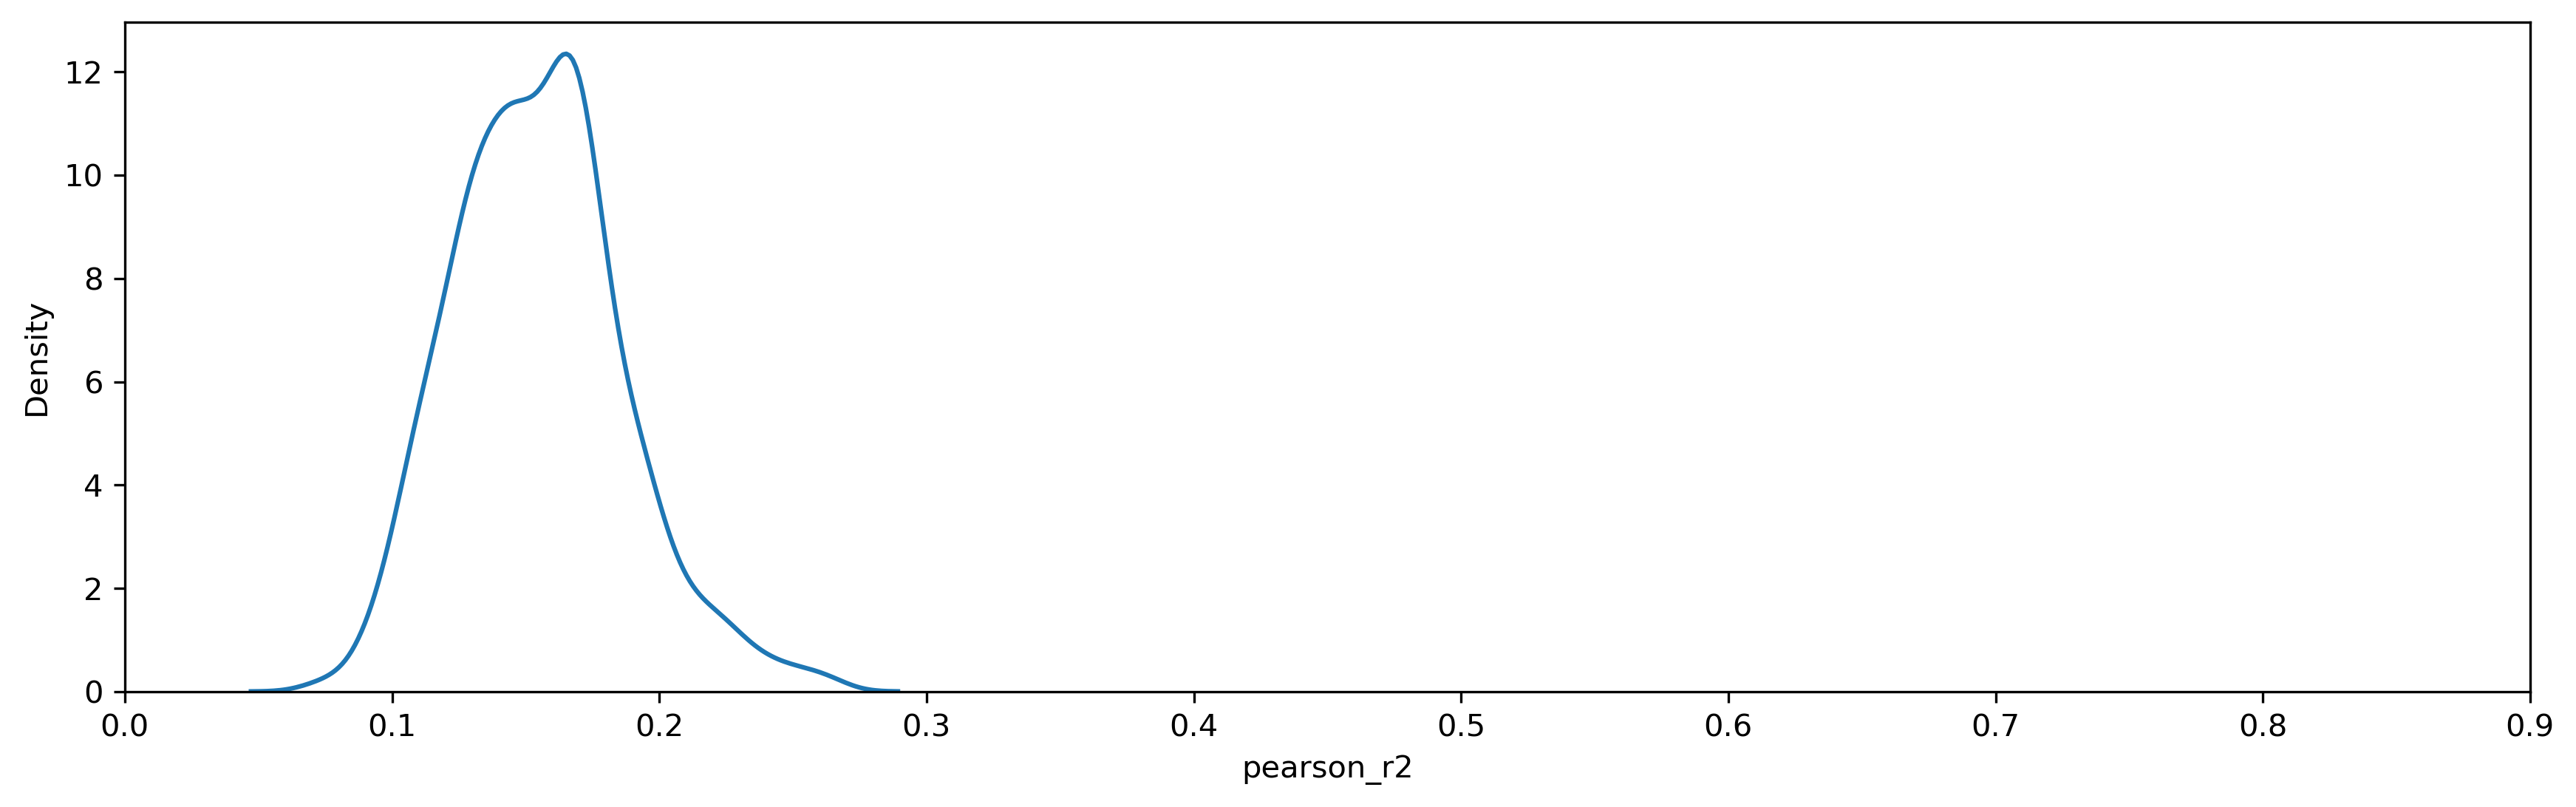

In [22]:
fig_hist_test, ax_hist_test = plt.subplots(figsize=(14, 4), dpi=300)
sns.kdeplot(data=df_performance_heritability, x='pearson_r2', ax=ax_hist_test)
ax_hist_test.set_xlim(right=0.9, left=0)

### 4.3 Calcualte and plot model performance on training set

In [61]:
fn_train = '/data100t1/home/wanying/CCHC/lipidomics/prediction_models/elastic_net/training/model_params/predicted/all_pred.txt'
df_train = pd.read_csv(fn_train, sep='\t').T.reset_index()

df_train.columns = ['LABID'] + list(df_train.iloc[0, 1:])
df_train.drop(index=0, inplace=True)
print(df_train.shape)
display(df_train.head(2))

print('#Load true values of train set')
fn_obs_train = '/data100t1/home/wanying/CCHC/lipidomics/prediction_models/input_docs/lipid_traits_residuals/train/lipid_species_residuals_adj_for_sex_age_pc1-5.txt'
df_obs = pd.read_csv(fn_obs_train, sep='\t').T.reset_index()
df_obs.columns = ['LABID'] + list(df_obs.iloc[0, 1:])
df_obs.drop(index=0, inplace=True)
print(df_obs.shape)
display(df_obs.head(2))

(1607, 831)


,LABID,AC(10:0),AC(12:0),AC(12:1),AC(13:0),AC(14:0),AC(14:1),AC(14:2),AC(15:0) (a),AC(15:0) (b),...,TG(56:8) [NL-20:4],PE(P-16:0/20:3) (b),PE(P-16:0/20:4),PE(P-16:0/20:5),PE(P-16:0/22:4),PE(P-16:0/22:5) (n3),PE(P-16:0/22:5) (n6),PE(P-16:0/22:6),PE(P-17:0/20:4) (a),PE(P-17:0/20:4) (b)
1,HA0023,0.316115,-0.325844,-0.285886,-0.746808,-0.804707,-0.123448,-0.156229,-0.679449,-0.048854,...,-1.049404,-2.866549,-1.876192,-1.092608,-0.416432,-0.912104,-1.33499,-2.803666,-0.69214,-0.982135
2,BD6180,0.20342,0.312443,-0.070548,0.715186,-0.055081,-0.056725,0.811969,0.474867,-0.775207,...,0.595656,-0.408095,-0.710983,-0.358901,-0.477258,-0.215422,-0.967045,-0.073973,-0.227753,-0.626991


#Load true values of train set
(1607, 831)


,LABID,Sph(d18:1),Sph(d18:2),S1P(d16:1),S1P(d18:0),S1P(d18:1),S1P(d18:2),dhCer(d18:0/16:0),dhCer(d18:0/18:0),dhCer(d18:0/20:0),...,TG(O-54:4) [NL-18:2],Ubiquinone,CE(18:2) [+OH],CE(20:4) [+OH],LPC(18:2) [+OH],LPC(20:4) [+OH],LPC(22:6) [+OH],PC(34:2) [+OH],PC(36:4) [+OH],PC(38:6) [+OH]
1,HA0023,0.310532,0.132709,-0.795436,0.376324,-0.184328,-0.015216,-1.221387,-0.099012,-1.099445,...,-1.850333,-2.189684,-0.622139,-2.174139,-0.410192,-0.732501,-0.867125,-0.667963,-1.420573,-1.373217
2,BD6180,-0.585136,-0.112758,-0.530853,-0.09867,-0.027778,-0.200709,-0.26206,-0.902043,-1.031974,...,-0.237156,-0.347881,-0.008578,-0.235905,-0.439945,-0.825717,-1.095246,0.161639,-0.439407,0.06896


In [62]:
# Calculate pearson r2 of pred and observed
df_merged = df_obs.merge(df_train, on='LABID', suffixes=('_true', '_pred'))

pearson_r2, spearman_r2 = [], []
for lipid in df_obs.columns[1:]:
    pearson_r2.append(stats.pearsonr(df_merged[lipid+'_pred'], df_merged[lipid+'_true'])[0]**2)
    spearman_r2.append(stats.spearmanr(df_merged[lipid+'_pred'], df_merged[lipid+'_true'])[0]**2)
        
df_performance = pd.DataFrame(data=df_obs.columns[1:], columns=['lipid_species'])
df_performance['pearson_r2'] = pearson_r2
df_performance['spearman_r2'] = spearman_r2

cols = ['lipid_species', 'lipid_class', 'heritability_unrelated', 'SE_unrelated']
df_performance_heritability = df_performance.merge(df_heritability_all, on='lipid_species')
df_performance_heritability.sort_values(by='heritability_unrelated', inplace=True)
df_performance_heritability['95CI'] = 1.96*df_performance_heritability['SE_unrelated']
df_performance_heritability.reset_index(drop=True, inplace=True)
display(df_performance_heritability.head(2))

,lipid_species,pearson_r2,spearman_r2,lipid_class,lipid_name,heritability_all,SE_all,heritability_unrelated,SE_unrelated,95CI
0,PE(P-15:0/20:4) (b),0.873384,0.866542,PE(P),PE-P-15:0-20:4-_-b-,0.245407,0.065371,0.000001,0.187843,0.368172
1,PE(P-18:0/22:5) (n6),0.906576,0.905247,PE(P),PE-P-18:0-22:5-_-n6-,0.445517,0.063887,0.000001,0.190773,0.373915


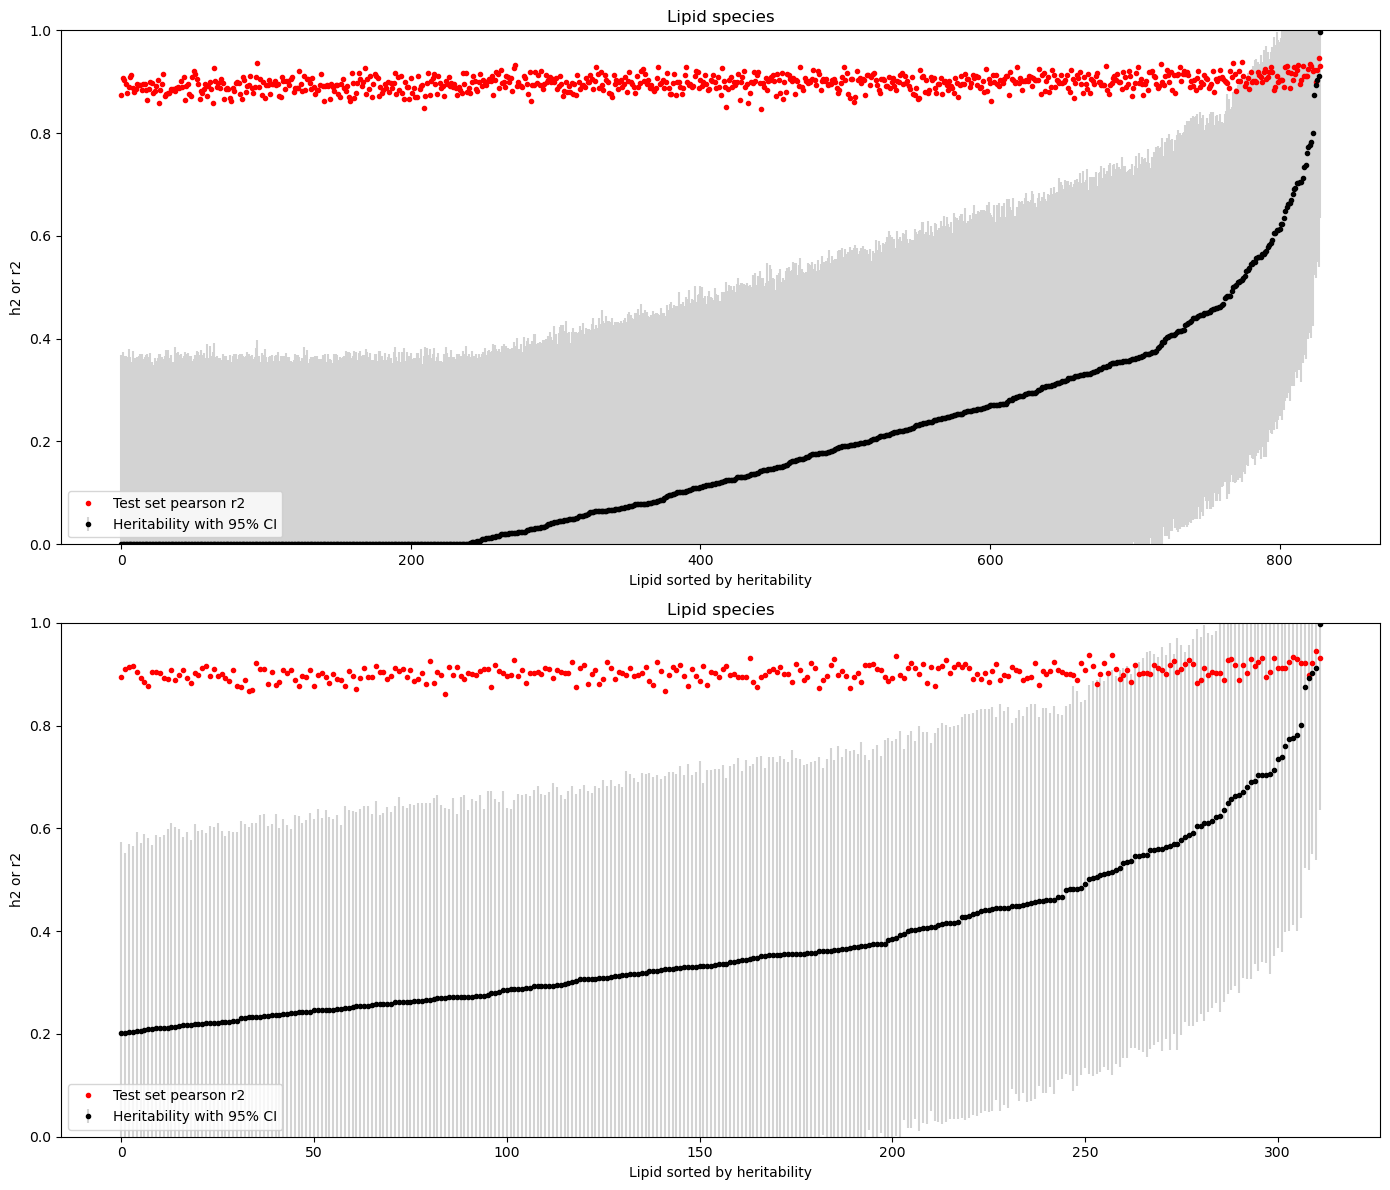

In [60]:
fig_test, ax_test = plt.subplots(dpi=100, figsize=(14, 12), nrows=2)
mask = df_performance_heritability['heritability_unrelated']>0.2
ax_test[0].errorbar(df_performance_heritability.index, df_performance_heritability['heritability_unrelated'],
                 yerr=df_performance_heritability['95CI'], ls='', marker='.', color='k', ecolor='lightgrey',
                 label=f'Heritability with 95% CI (Mean h2={df_performance_heritability["heritability_unrelated"].mean():.4f})')
ax_test[0].plot(df_performance_heritability.index, df_performance_heritability['pearson_r2'],
             ls='', marker='.', color='r', label=f'Test set pearson r2 (Mean r2={df_performance_heritability["pearson_r2"].mean():.4f})')
ax_test[0].set_ylim(bottom=0, top=1)
ax_test[0].set_title('Lipid species')
ax_test[0].set_xlabel('Lipid sorted by heritability')
ax_test[0].set_ylabel('h2 or r2')
ax_test[0].legend()

ax_test[1].errorbar([x for x in range(len(df_performance_heritability[mask]))],
                 df_performance_heritability[mask]['heritability_unrelated'],
                 yerr=df_performance_heritability[mask]['95CI'],
                 ls='', marker='.', color='k', ecolor='lightgrey',
                 label=f'Heritability with 95% CI (Mean r2={df_performance_heritability[mask]["heritability_unrelated"].mean():.4f})')
ax_test[1].plot([x for x in range(len(df_performance_heritability[mask]))],
             df_performance_heritability[mask]['pearson_r2'],
             ls='', marker='.', color='r', label=f'Test set pearson r2 (Mean r2={df_performance_heritability[mask]["pearson_r2"].mean():.4f})')

ax_test[1].set_ylim(bottom=0, top=1)
ax_test[1].set_title('Lipid species')
ax_test[1].set_xlabel('Lipid sorted by heritability')
ax_test[1].set_ylabel('h2 or r2')
ax_test[1].legend()

fig_test.tight_layout()

## 5. (2023/08) Lasso model
According to Eric's suggestions, might need more sparsity in the model. So test lasso and single SNP (smallest pval) model as comparison

### 5.1 Load heritability (calculated by training set, ie. max unrelated set)

In [72]:
# Load heritability of all sample (~2200) vs training set (~1600)
print('#Load heritability of all samples and training set')
heritability_dir = '/data100t1/home/wanying/CCHC/lipidomics/output/traininig_set_lipid_species_GWAS/heritability_by_GREML_species'
fn_heritability = 'heritability_species_class_mapped_all_vs_unrel.txt'
df_heritability_all = pd.read_csv(f'{heritability_dir}/{fn_heritability}', sep='\t')
df_heritability_all.sort_values(by='heritability_unrelated', ascending=False, inplace=True)
display(df_heritability_all.head(2))


#Load heritability of all samples and training set


,lipid_species,lipid_class,lipid_name,heritability_all,SE_all,heritability_unrelated,SE_unrelated
0,CE(20:4),CE,CE-20:4-,0.893879,0.035484,0.997111,0.184409
2,CE(20:5),CE,CE-20:5-,0.806171,0.042057,0.911957,0.190165


### 5.2 Calcualte and plot model performance on test set

In [73]:
# Load data
print('#Load ID mapping file')
fn_id_mapping = '/data100t1/home/wanying/CCHC/doc/samples_IDs/202211_merged_RNA_lipid_protein_genotype_mapping_and_availability.txt'
df_id_mapping = pd.read_csv(fn_id_mapping, sep='\t').dropna(subset='lipidomic')
id_mapping = df_id_mapping[['genotype_ID', 'lipidomic']].set_index('genotype_ID').to_dict()['lipidomic']

print('#Load predicted values on test set (df_pred)')
fn_pred_test = '/data100t1/home/wanying/CCHC/lipidomics/prediction_models/lasso/test/pred_vals_lipid_species.txt'
df_pred = pd.read_csv(fn_pred_test, sep='\t').rename(columns=id_mapping).T.reset_index()
df_pred.columns = ['LABID'] + list(df_pred.iloc[0, 1:])
df_pred.drop(index=0, inplace=True)
display(df_pred.head(2))

print('#Load true values of test set (df_obs)')
fn_obs_test = '/data100t1/home/wanying/CCHC/lipidomics/prediction_models/input_docs/lipid_traits_residuals/test/lipid_species_residuals_adj_for_sex_age_pc1-5.txt'
df_obs = pd.read_csv(fn_obs_test, sep='\t').T.reset_index()
df_obs.columns = ['LABID'] + list(df_obs.iloc[0, 1:])
df_obs.drop(index=0, inplace=True)
display(df_obs.head(2))

#Load ID mapping file
#Load predicted values on test set (df_pred)


,LABID,Sph(d18:1),Sph(d18:2),S1P(d16:1),S1P(d18:0),S1P(d18:1),S1P(d18:2),dhCer(d18:0/16:0),dhCer(d18:0/18:0),dhCer(d18:0/20:0),...,TG(O-54:4) [NL-18:2],Ubiquinone,CE(18:2) [+OH],CE(20:4) [+OH],LPC(18:2) [+OH],LPC(20:4) [+OH],LPC(22:6) [+OH],PC(34:2) [+OH],PC(36:4) [+OH],PC(38:6) [+OH]
1,10Y0021,0.055255,1.181528,1.827681,0.662857,-0.039371,0.519414,-0.360033,-0.443407,0.239837,...,0.155096,-1.288033,-1.194898,0.192682,-0.516443,0.121498,-0.233146,-0.489302,0.508667,-0.659558
2,10Y0381,-0.400947,0.933378,0.904231,0.655379,-0.997205,0.025901,-0.010456,-0.91764,0.269032,...,0.573484,-0.424356,0.58153,-0.339623,-0.683109,-1.137934,-0.759196,0.257368,-0.150769,-0.262843


#Load true values of test set (df_obs)


,LABID,Sph(d18:1),Sph(d18:2),S1P(d16:1),S1P(d18:0),S1P(d18:1),S1P(d18:2),dhCer(d18:0/16:0),dhCer(d18:0/18:0),dhCer(d18:0/20:0),...,TG(O-54:4) [NL-18:2],Ubiquinone,CE(18:2) [+OH],CE(20:4) [+OH],LPC(18:2) [+OH],LPC(20:4) [+OH],LPC(22:6) [+OH],PC(34:2) [+OH],PC(36:4) [+OH],PC(38:6) [+OH]
1,10Y0021,-0.16291,-0.942903,-1.151542,-0.274446,-1.367009,-1.618647,-0.658969,-0.834448,-0.33319,...,-0.495799,-1.205354,-0.167414,-1.076788,-1.30392,-1.151843,-0.904325,-0.791894,-1.058619,-0.50957
2,10Y0381,-0.529891,-0.187996,0.303026,-1.409466,-1.293871,-0.935225,0.985213,0.137695,0.365254,...,0.861963,0.111629,0.922712,-0.496905,-0.077265,0.096307,0.225141,-0.258755,0.810306,0.980918


,lipid_species,pearson_r2,spearman_r2,lipid_class,lipid_name,heritability_all,SE_all,heritability_unrelated,SE_unrelated,95CI
0,PE(P-15:0/20:4) (b),0.121074,0.109296,PE(P),PE-P-15:0-20:4-_-b-,0.245407,0.065371,0.000001,0.187843,0.368172
1,PE(P-18:0/22:5) (n6),0.190754,0.174844,PE(P),PE-P-18:0-22:5-_-n6-,0.445517,0.063887,0.000001,0.190773,0.373915


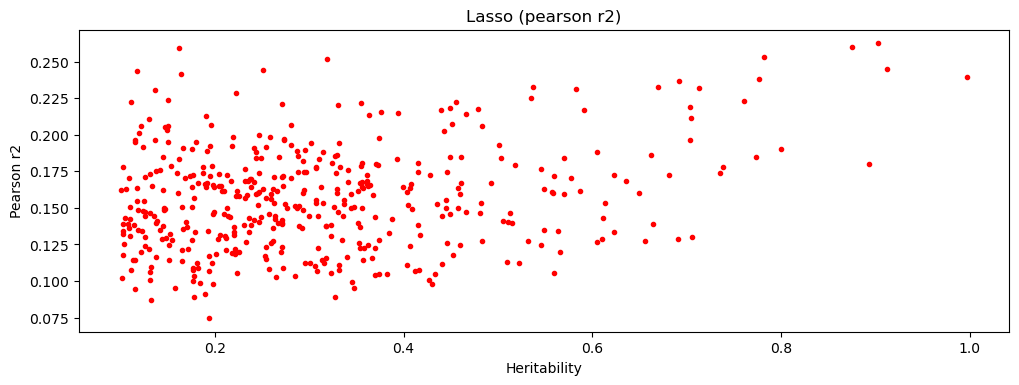

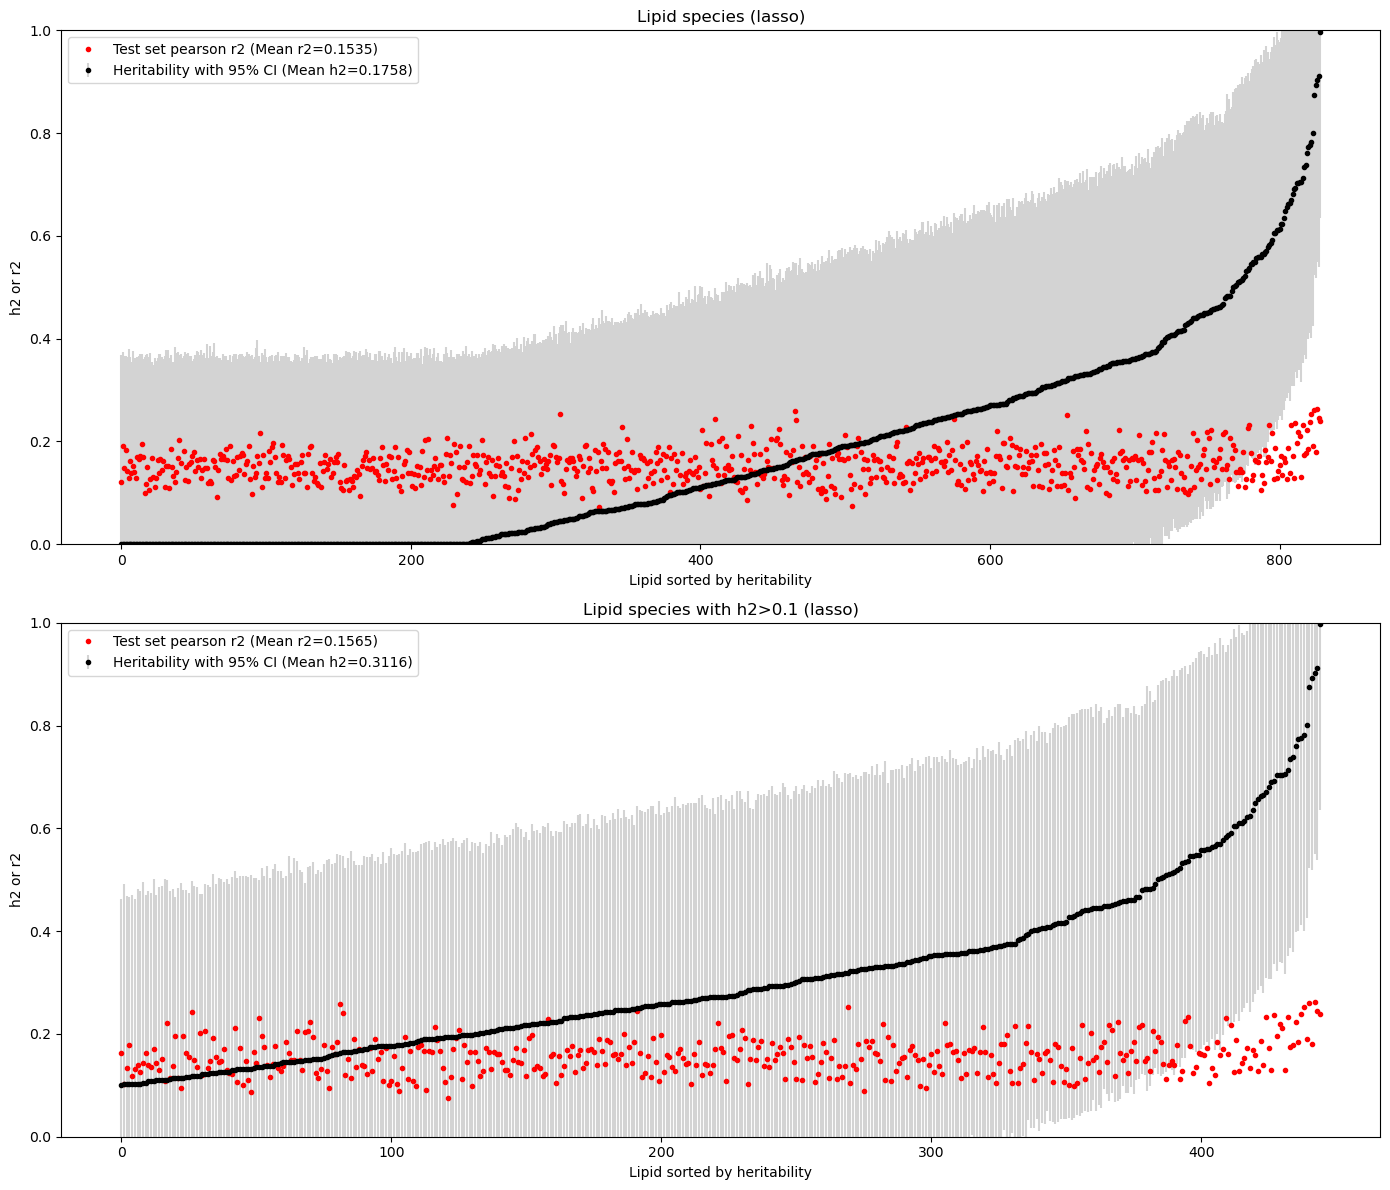

In [74]:
# Calculate pearson r2 of pred and observed
df_merged = df_obs.merge(df_pred, on='LABID', suffixes=('_true', '_pred'))

pearson_r2, spearman_r2 = [], []
for lipid in df_obs.columns[1:]:
    if lipid=='PI(15-MHDA_20:4)\PI(17:0_20:4)':
        #Skip this lipid for now. Training failed due to file name issue
        pearson_r2.append(None)
        spearman_r2.append(None)
        continue
        
    pearson_r2.append(stats.pearsonr(df_merged[lipid+'_pred'], df_merged[lipid+'_true'])[0]**2)
    spearman_r2.append(stats.spearmanr(df_merged[lipid+'_pred'], df_merged[lipid+'_true'])[0]**2)
    # pearson_r2.append(stats.pearsonr(df_merged[lipid+'_pred'], df_merged[lipid+'_true'])[0])
    # spearman_r2.append(stats.spearmanr(df_merged[lipid+'_pred'], df_merged[lipid+'_true'])[0])
        
df_performance = pd.DataFrame(data=df_obs.columns[1:], columns=['lipid_species'])
df_performance['pearson_r2'] = pearson_r2
df_performance['spearman_r2'] = spearman_r2

# Calculate 95% CI
cols = ['lipid_species', 'lipid_class', 'heritability_unrelated', 'SE_unrelated']
df_performance_heritability = df_performance.merge(df_heritability_all, on='lipid_species')
df_performance_heritability.sort_values(by='heritability_unrelated', inplace=True)
df_performance_heritability['95CI'] = 1.96*df_performance_heritability['SE_unrelated']
df_performance_heritability.reset_index(drop=True, inplace=True)
display(df_performance_heritability.head(2))

# Plot heritability vs. model performance
threshold = 0.1
mask = df_performance_heritability['heritability_unrelated']>threshold
fig, ax = plt.subplots(dpi=100, figsize=(12, 4))
ax.plot(df_performance_heritability[mask]['heritability_unrelated'],
        df_performance_heritability[mask]['pearson_r2'],
        ls='', marker='.', color='r', label='Test set pearson r2')
ax.set_title('Lasso (pearson r2)')
ax.set_xlabel('Heritability')
ax.set_ylabel('Pearson r2')


fig_test, ax_test = plt.subplots(dpi=100, figsize=(14, 12), nrows=2)
ax_test[0].errorbar(df_performance_heritability.index, df_performance_heritability['heritability_unrelated'],
                 yerr=df_performance_heritability['95CI'], ls='', marker='.', color='k', ecolor='lightgrey',
                 label=f"Heritability with 95% CI (Mean h2={df_performance_heritability['heritability_unrelated'].mean():.4f})")
ax_test[0].plot(df_performance_heritability.index, df_performance_heritability['pearson_r2'],
             ls='', marker='.', color='r', label=f"Test set pearson r2 (Mean r2={df_performance_heritability['pearson_r2'].mean():.4f})")
ax_test[0].set_ylim(bottom=0, top=1)
ax_test[0].set_title('Lipid species (lasso)')
ax_test[0].set_xlabel('Lipid sorted by heritability')
ax_test[0].set_ylabel('h2 or r2')
ax_test[0].legend()

# Only plot SNPs with heritability over threshold
threshold = 0.1
mask = df_performance_heritability['heritability_unrelated']>threshold
ax_test[1].errorbar([x for x in range(len(df_performance_heritability[mask]))],
                 df_performance_heritability[mask]['heritability_unrelated'],
                 yerr=df_performance_heritability[mask]['95CI'],
                 ls='', marker='.', color='k', ecolor='lightgrey',
                 label=f"Heritability with 95% CI (Mean h2={df_performance_heritability[mask]['heritability_unrelated'].mean():.4f})")
ax_test[1].plot([x for x in range(len(df_performance_heritability[mask]))],
             df_performance_heritability[mask]['pearson_r2'],
             ls='', marker='.', color='r', label=f"Test set pearson r2 (Mean r2={df_performance_heritability[mask]['pearson_r2'].mean():.4f})")

ax_test[1].set_ylim(bottom=0, top=1)
ax_test[1].set_title(f'Lipid species with h2>{threshold} (lasso)')
ax_test[1].set_xlabel('Lipid sorted by heritability')
ax_test[1].set_ylabel('h2 or r2')
ax_test[1].legend()

fig_test.tight_layout()

In [44]:
df_performance_heritability[mask]

,lipid_species,pearson_r2,spearman_r2,lipid_class,lipid_name,heritability_all,SE_all,heritability_unrelated,SE_unrelated,95CI
384,LPE(17:0),0.901641,0.894141,LPE,LPE-17:0-,0.407108,0.063168,0.100864,0.184857,0.362320
385,dxCA,0.901436,0.897341,BA,dxCA,0.222451,0.066883,0.101777,0.198582,0.389221
386,PC(P-18:1/18:1),0.886854,0.881944,PC(P),PC-P-18:1-18:1-,0.402749,0.063418,0.102028,0.186822,0.366171
387,Cer(d19:1/24:0),0.878245,0.872511,Cer(d),Cer-d19:1-24:0-,0.421500,0.062521,0.102079,0.186106,0.364768
388,PI(34:0),0.893174,0.889668,PI,PI-34:0-,0.313718,0.067788,0.102453,0.187876,0.368237
...,...,...,...,...,...,...,...,...,...,...
824,PC(16:0_20:4),0.923493,0.918004,PC,PC-16:0_20:4-,0.831594,0.038231,0.874927,0.179579,0.351975
825,DE(20:4),0.895299,0.895755,DE,DE-20:4-,0.713117,0.050106,0.893228,0.191189,0.374730
826,PC(18:0_20:4),0.917577,0.907317,PC,PC-18:0_20:4-,0.745127,0.048278,0.903040,0.180109,0.353014
827,CE(20:5),0.947303,0.944147,CE,CE-20:5-,0.806171,0.042057,0.911957,0.190165,0.372723


### 5.3 Calcualte and plot model performance on training set

In [39]:
fn_train = '/data100t1/home/wanying/CCHC/lipidomics/prediction_models/lasso/training/all_pred.txt'
df_train = pd.read_csv(fn_train, sep='\t').T.reset_index()

df_train.columns = ['LABID'] + list(df_train.iloc[0, 1:])
df_train.drop(index=0, inplace=True)
print(df_train.shape)
display(df_train.head(2))

print('#Load true values of train set')
fn_obs_train = '/data100t1/home/wanying/CCHC/lipidomics/prediction_models/input_docs/lipid_traits_residuals/train/lipid_species_residuals_adj_for_sex_age_pc1-5.txt'
df_obs = pd.read_csv(fn_obs_train, sep='\t').T.reset_index()
df_obs.columns = ['LABID'] + list(df_obs.iloc[0, 1:])
df_obs.drop(index=0, inplace=True)
print(df_obs.shape)
display(df_obs.head(2))

(1607, 830)


,LABID,AC(10:0),AC(12:0),AC(12:1),AC(13:0),AC(14:0),AC(14:0)-OH,AC(14:1),AC(14:1)-OH,AC(14:2),...,TG(O-52:2) [NL-18:1],TG(O-52:2) [SIM],TG(O-54:2) [NL-17:1],TG(O-54:2) [NL-18:1],TG(O-54:2) [SIM],TG(O-54:3) [NL-17:1],TG(O-54:3) [NL-18:1],TG(O-54:4) [NL-17:1],TG(O-54:4) [NL-18:2],Ubiquinone
1,HA0023,0.326678,-0.321029,-0.300397,-0.722237,-0.812208,-0.523225,-0.111788,-0.249474,-0.16666,...,-1.357179,-1.071539,-1.343179,-1.726431,-1.268424,-1.319246,-1.531521,-1.263283,-1.109602,-1.516345
2,BD6180,0.190759,0.322958,-0.084363,0.721182,-0.052068,0.829062,-0.053571,0.754917,0.807538,...,-0.778621,-0.945711,-0.986645,-0.837273,-0.916372,-0.503523,-1.026067,-0.192145,-0.312012,0.063432


#Load true values of train set
(1607, 831)


,LABID,Sph(d18:1),Sph(d18:2),S1P(d16:1),S1P(d18:0),S1P(d18:1),S1P(d18:2),dhCer(d18:0/16:0),dhCer(d18:0/18:0),dhCer(d18:0/20:0),...,TG(O-54:4) [NL-18:2],Ubiquinone,CE(18:2) [+OH],CE(20:4) [+OH],LPC(18:2) [+OH],LPC(20:4) [+OH],LPC(22:6) [+OH],PC(34:2) [+OH],PC(36:4) [+OH],PC(38:6) [+OH]
1,HA0023,0.310532,0.132709,-0.795436,0.376324,-0.184328,-0.015216,-1.221387,-0.099012,-1.099445,...,-1.850333,-2.189684,-0.622139,-2.174139,-0.410192,-0.732501,-0.867125,-0.667963,-1.420573,-1.373217
2,BD6180,-0.585136,-0.112758,-0.530853,-0.09867,-0.027778,-0.200709,-0.26206,-0.902043,-1.031974,...,-0.237156,-0.347881,-0.008578,-0.235905,-0.439945,-0.825717,-1.095246,0.161639,-0.439407,0.06896


,lipid_species,pearson_r2,spearman_r2,lipid_class,lipid_name,heritability_all,SE_all,heritability_unrelated,SE_unrelated,95CI
0,PE(P-15:0/20:4) (b),0.870327,0.862996,PE(P),PE-P-15:0-20:4-_-b-,0.245407,0.065371,0.000001,0.187843,0.368172
1,PE(P-18:0/22:5) (n6),0.908241,0.906883,PE(P),PE-P-18:0-22:5-_-n6-,0.445517,0.063887,0.000001,0.190773,0.373915


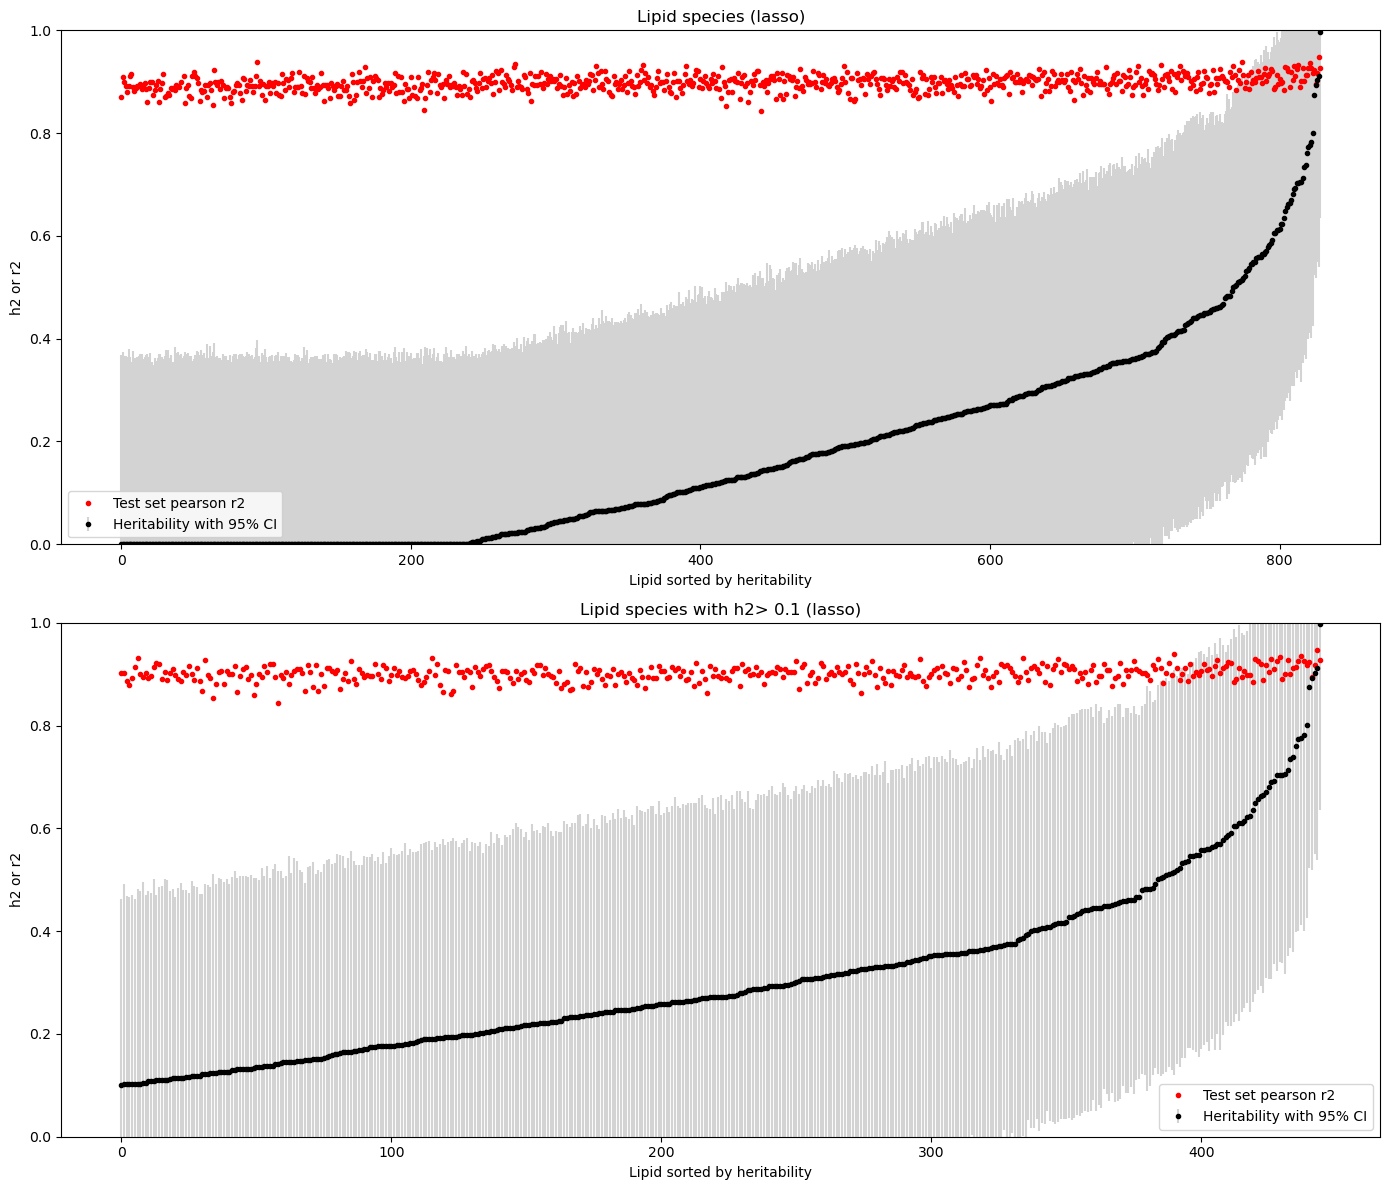

In [42]:
# ########## Calculate pearson r2 of pred and observed ##########
df_merged = df_obs.merge(df_train, on='LABID', suffixes=('_true', '_pred'))

pearson_r2, spearman_r2 = [], []
for lipid in df_obs.columns[1:]:
    if lipid=='PI(15-MHDA_20:4)\PI(17:0_20:4)':
        #Skip this lipid for now. Training failed due to file name issue
        pearson_r2.append(None)
        spearman_r2.append(None)
        continue
        
    pearson_r2.append(stats.pearsonr(df_merged[lipid+'_pred'], df_merged[lipid+'_true'])[0]**2)
    spearman_r2.append(stats.spearmanr(df_merged[lipid+'_pred'], df_merged[lipid+'_true'])[0]**2)
        
df_performance = pd.DataFrame(data=df_obs.columns[1:], columns=['lipid_species'])
df_performance['pearson_r2'] = pearson_r2
df_performance['spearman_r2'] = spearman_r2

cols = ['lipid_species', 'lipid_class', 'heritability_unrelated', 'SE_unrelated']
df_performance_heritability = df_performance.merge(df_heritability_all, on='lipid_species')
df_performance_heritability.sort_values(by='heritability_unrelated', inplace=True)
df_performance_heritability['95CI'] = 1.96*df_performance_heritability['SE_unrelated']
df_performance_heritability.reset_index(drop=True, inplace=True)
display(df_performance_heritability.head(2))


# ########## Plot r2 ##########
fig_test, ax_test = plt.subplots(dpi=100, figsize=(14, 12), nrows=2)

ax_test[0].errorbar(df_performance_heritability.index, df_performance_heritability['heritability_unrelated'],
                 yerr=df_performance_heritability['95CI'], ls='', marker='.', color='k', ecolor='lightgrey',
                 label='Heritability with 95% CI')
ax_test[0].plot(df_performance_heritability.index, df_performance_heritability['pearson_r2'],
             ls='', marker='.', color='r', label='Test set pearson r2')
ax_test[0].set_ylim(bottom=0, top=1)
ax_test[0].set_title('Lipid species (lasso)')
ax_test[0].set_xlabel('Lipid sorted by heritability')
ax_test[0].set_ylabel('h2 or r2')
ax_test[0].legend()

threshold=0.1
mask = df_performance_heritability['heritability_unrelated']>threshold
ax_test[1].errorbar([x for x in range(len(df_performance_heritability[mask]))],
                 df_performance_heritability[mask]['heritability_unrelated'],
                 yerr=df_performance_heritability[mask]['95CI'],
                 ls='', marker='.', color='k', ecolor='lightgrey',
                 label='Heritability with 95% CI')
ax_test[1].plot([x for x in range(len(df_performance_heritability[mask]))],
             df_performance_heritability[mask]['pearson_r2'],
             ls='', marker='.', color='r', label='Test set pearson r2')

ax_test[1].set_ylim(bottom=0, top=1)
ax_test[1].set_title(f'Lipid species with h2> {threshold} (lasso)')
ax_test[1].set_xlabel('Lipid sorted by heritability')
ax_test[1].set_ylabel('h2 or r2')
ax_test[1].legend()

fig_test.tight_layout()

## 6. (2023/08) Single SNP model
(Based on Eric's suggestion)

According to the predixcan paper (Gamazon, et al. 2015)
```
We built prediction models in the DGN whole-blood cohort using LASSO, elastic net (α = 0.5) and polygenic score at several P-value thresholds (single top SNP, 1 × 10−4, 0.001, 0.01, 0.05, 0.5 and 1). We assessed predictive performance using tenfold cross-validation (R2 of estimated GReX versus observed expression) in the initial data set as well as in an independent set
```

```
In the simple polygenic score approach, we estimate wk as the single-variant coefficient derived from regressing the gene expression trait Y on variant Xk (as implemented in the eQTL analysis software Matrix eQTL46) using the reference transcriptome data.
```

### 6.1 Load heritability (calculated by training set, ie. max unrelated set)

In [165]:
# Load heritability of all sample (~2200) vs training set (~1600)
print('#Load heritability of all samples and training set')
heritability_dir = '/data100t1/home/wanying/CCHC/lipidomics/output/traininig_set_lipid_species_GWAS/heritability_by_GREML_species'
fn_heritability = 'heritability_species_class_mapped_all_vs_unrel.txt'
df_heritability_all = pd.read_csv(f'{heritability_dir}/{fn_heritability}', sep='\t')
df_heritability_all.sort_values(by='heritability_unrelated', ascending=False, inplace=True)
display(df_heritability_all.head(2))


#Load heritability of all samples and training set


,lipid_species,lipid_class,lipid_name,heritability_all,SE_all,heritability_unrelated,SE_unrelated
0,CE(20:4),CE,CE-20:4-,0.893879,0.035484,0.997111,0.184409
2,CE(20:5),CE,CE-20:5-,0.806171,0.042057,0.911957,0.190165


### 6.2 Calcualte and plot model performance on test set

In [173]:
# Load data
print('#Load ID mapping file')
fn_id_mapping = '/data100t1/home/wanying/CCHC/doc/samples_IDs/202211_merged_RNA_lipid_protein_genotype_mapping_and_availability.txt'
df_id_mapping = pd.read_csv(fn_id_mapping, sep='\t').dropna(subset='lipidomic')
id_mapping = df_id_mapping[['genotype_ID', 'lipidomic']].set_index('genotype_ID').to_dict()['lipidomic']

print('#Load predicted values on test set (df_pred)')
fn_pred_test = '/data100t1/home/wanying/CCHC/lipidomics/prediction_models/prs_ols/test/pred_lipid_species_single_top_snp.test.txt'
df_pred = pd.read_csv(fn_pred_test, sep='\t').rename(columns=id_mapping).T.reset_index()
df_pred.columns = ['LABID'] + list(df_pred.iloc[0, 1:])
df_pred.drop(index=0, inplace=True)
display(df_pred.head(2))

print('#Load true values of test set (df_obs)')
fn_obs_test = '/data100t1/home/wanying/CCHC/lipidomics/prediction_models/input_docs/lipid_traits_residuals/test/lipid_species_residuals_adj_for_sex_age_pc1-5.txt'
df_obs = pd.read_csv(fn_obs_test, sep='\t').T.reset_index()
df_obs.columns = ['LABID'] + list(df_obs.iloc[0, 1:])
df_obs.drop(index=0, inplace=True)
display(df_obs.head(2))

#Load ID mapping file
#Load predicted values on test set (df_pred)


,LABID,Sph(d18:1),Sph(d18:2),S1P(d16:1),S1P(d18:0),S1P(d18:1),S1P(d18:2),dhCer(d18:0/16:0),dhCer(d18:0/18:0),dhCer(d18:0/20:0),...,TG(O-54:4) [NL-18:2],Ubiquinone,CE(18:2) [+OH],CE(20:4) [+OH],LPC(18:2) [+OH],LPC(20:4) [+OH],LPC(22:6) [+OH],PC(34:2) [+OH],PC(36:4) [+OH],PC(38:6) [+OH]
1,10Y0021,-0.005063,-0.010998,0.149258,0.025576,0.027767,-0.078602,-0.05972,-0.004085,0.103866,...,0.001335,-0.005282,0.025275,0.333331,0.011764,0.113283,-0.015648,0.028104,0.34698,-0.01376
2,10Y0381,-0.005063,-0.010998,0.149897,0.025576,0.027767,-0.078602,-0.05972,-0.004085,-0.081609,...,0.000748,-0.005282,0.025275,0.334659,0.011764,0.112769,-0.015648,0.028104,0.346072,-0.01376


#Load true values of test set (df_obs)


,LABID,Sph(d18:1),Sph(d18:2),S1P(d16:1),S1P(d18:0),S1P(d18:1),S1P(d18:2),dhCer(d18:0/16:0),dhCer(d18:0/18:0),dhCer(d18:0/20:0),...,TG(O-54:4) [NL-18:2],Ubiquinone,CE(18:2) [+OH],CE(20:4) [+OH],LPC(18:2) [+OH],LPC(20:4) [+OH],LPC(22:6) [+OH],PC(34:2) [+OH],PC(36:4) [+OH],PC(38:6) [+OH]
1,10Y0021,-0.16291,-0.942903,-1.151542,-0.274446,-1.367009,-1.618647,-0.658969,-0.834448,-0.33319,...,-0.495799,-1.205354,-0.167414,-1.076788,-1.30392,-1.151843,-0.904325,-0.791894,-1.058619,-0.50957
2,10Y0381,-0.529891,-0.187996,0.303026,-1.409466,-1.293871,-0.935225,0.985213,0.137695,0.365254,...,0.861963,0.111629,0.922712,-0.496905,-0.077265,0.096307,0.225141,-0.258755,0.810306,0.980918


/data100t1/gapps/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/data100t1/gapps/anaconda3/lib/python3.9/site-packages/scipy/stats/stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


,lipid_species,pearson_r2,spearman_r2,lipid_class,lipid_name,heritability_all,SE_all,heritability_unrelated,SE_unrelated,95CI
0,PE(P-15:0/20:4) (b),0.000757,0.002250,PE(P),PE-P-15:0-20:4-_-b-,0.245407,0.065371,0.000001,0.187843,0.368172
1,PE(P-18:0/22:5) (n6),0.003807,0.002585,PE(P),PE-P-18:0-22:5-_-n6-,0.445517,0.063887,0.000001,0.190773,0.373915


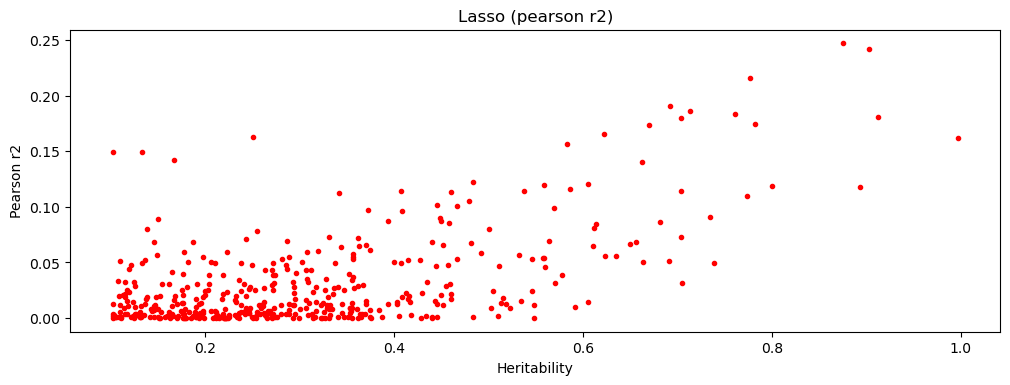

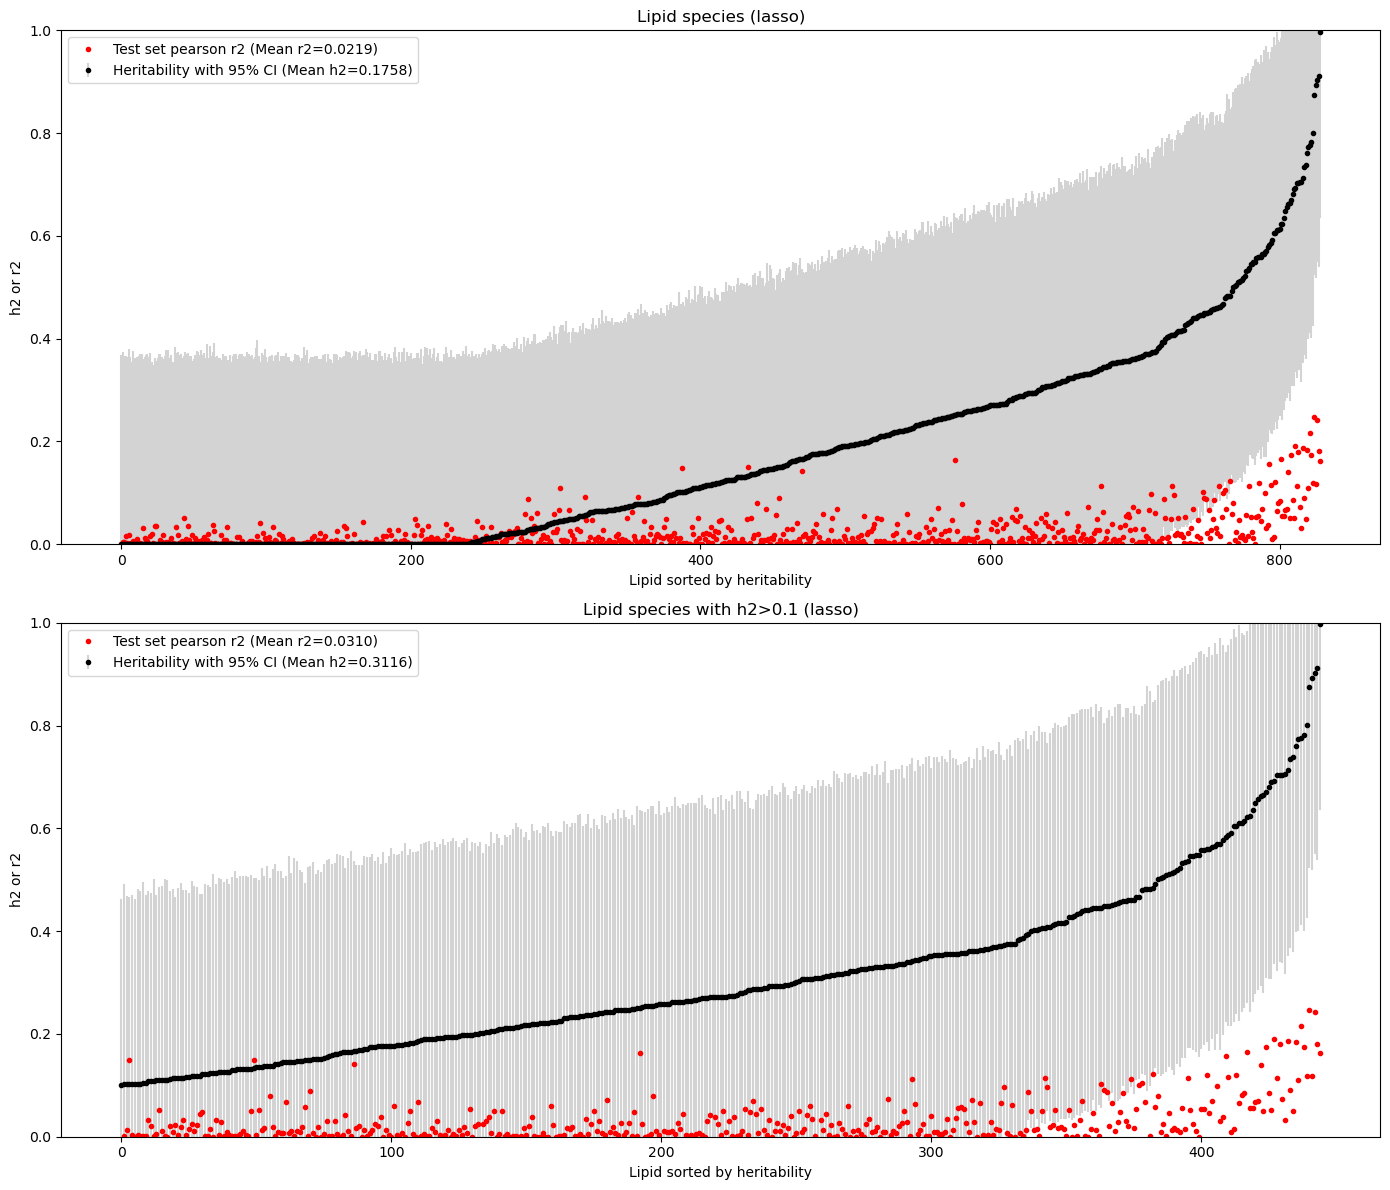

In [174]:
# Calculate pearson r2 of pred and observed
df_merged = df_obs.merge(df_pred, on='LABID', suffixes=('_true', '_pred'))

pearson_r2, spearman_r2 = [], []
for lipid in df_obs.columns[1:]:
    # if lipid=='PI(15-MHDA_20:4)\PI(17:0_20:4)':
    #     #Skip this lipid for now. Training failed due to file name issue
    #     pearson_r2.append(None)
    #     spearman_r2.append(None)
    #     continue
        
    pearson_r2.append(stats.pearsonr(df_merged[lipid+'_pred'], df_merged[lipid+'_true'])[0]**2)
    spearman_r2.append(stats.spearmanr(df_merged[lipid+'_pred'], df_merged[lipid+'_true'])[0]**2)
    # pearson_r2.append(stats.pearsonr(df_merged[lipid+'_pred'], df_merged[lipid+'_true'])[0])
    # spearman_r2.append(stats.spearmanr(df_merged[lipid+'_pred'], df_merged[lipid+'_true'])[0])
        
df_performance = pd.DataFrame(data=df_obs.columns[1:], columns=['lipid_species'])
df_performance['pearson_r2'] = pearson_r2
df_performance['spearman_r2'] = spearman_r2

# Calculate 95% CI
cols = ['lipid_species', 'lipid_class', 'heritability_unrelated', 'SE_unrelated']
df_performance_heritability = df_performance.merge(df_heritability_all, on='lipid_species')
df_performance_heritability.sort_values(by='heritability_unrelated', inplace=True)
df_performance_heritability['95CI'] = 1.96*df_performance_heritability['SE_unrelated']
df_performance_heritability.reset_index(drop=True, inplace=True)
display(df_performance_heritability.head(2))

# Plot heritability vs. model performance
threshold = 0.1
mask = df_performance_heritability['heritability_unrelated']>threshold
fig, ax = plt.subplots(dpi=100, figsize=(12, 4))
ax.plot(df_performance_heritability[mask]['heritability_unrelated'],
        df_performance_heritability[mask]['pearson_r2'],
        ls='', marker='.', color='r', label='Test set pearson r2')
ax.set_title('Lasso (pearson r2)')
ax.set_xlabel('Heritability')
ax.set_ylabel('Pearson r2')


fig_test, ax_test = plt.subplots(dpi=100, figsize=(14, 12), nrows=2)
ax_test[0].errorbar(df_performance_heritability.index, df_performance_heritability['heritability_unrelated'],
                 yerr=df_performance_heritability['95CI'], ls='', marker='.', color='k', ecolor='lightgrey',
                 label=f"Heritability with 95% CI (Mean h2={df_performance_heritability['heritability_unrelated'].mean():.4f})")
ax_test[0].plot(df_performance_heritability.index, df_performance_heritability['pearson_r2'],
             ls='', marker='.', color='r', label=f"Test set pearson r2 (Mean r2={df_performance_heritability['pearson_r2'].mean():.4f})")
ax_test[0].set_ylim(bottom=0, top=1)
ax_test[0].set_title('Lipid species (lasso)')
ax_test[0].set_xlabel('Lipid sorted by heritability')
ax_test[0].set_ylabel('h2 or r2')
ax_test[0].legend()

# Only plot SNPs with heritability over threshold
threshold = 0.1
mask = df_performance_heritability['heritability_unrelated']>threshold
ax_test[1].errorbar([x for x in range(len(df_performance_heritability[mask]))],
                 df_performance_heritability[mask]['heritability_unrelated'],
                 yerr=df_performance_heritability[mask]['95CI'],
                 ls='', marker='.', color='k', ecolor='lightgrey',
                 label=f"Heritability with 95% CI (Mean h2={df_performance_heritability[mask]['heritability_unrelated'].mean():.4f})")
ax_test[1].plot([x for x in range(len(df_performance_heritability[mask]))],
             df_performance_heritability[mask]['pearson_r2'],
             ls='', marker='.', color='r', label=f"Test set pearson r2 (Mean r2={df_performance_heritability[mask]['pearson_r2'].mean():.4f})")

ax_test[1].set_ylim(bottom=0, top=1)
ax_test[1].set_title(f'Lipid species with h2>{threshold} (lasso)')
ax_test[1].set_xlabel('Lipid sorted by heritability')
ax_test[1].set_ylabel('h2 or r2')
ax_test[1].legend()

fig_test.tight_layout()

### 6.3 Calcualte and plot model performance on training set

## 7. Multiple SNP mode (pval<1e-4)

### 7.1 Load heritability (calculated by training set, ie. max unrelated set)

In [177]:
# Load heritability of all sample (~2200) vs training set (~1600)
print('#Load heritability of all samples and training set')
heritability_dir = '/data100t1/home/wanying/CCHC/lipidomics/output/traininig_set_lipid_species_GWAS/heritability_by_GREML_species'
fn_heritability = 'heritability_species_class_mapped_all_vs_unrel.txt'
df_heritability_all = pd.read_csv(f'{heritability_dir}/{fn_heritability}', sep='\t')
df_heritability_all.sort_values(by='heritability_unrelated', ascending=False, inplace=True)
display(df_heritability_all.head(2))

#Load heritability of all samples and training set


,lipid_species,lipid_class,lipid_name,heritability_all,SE_all,heritability_unrelated,SE_unrelated
0,CE(20:4),CE,CE-20:4-,0.893879,0.035484,0.997111,0.184409
2,CE(20:5),CE,CE-20:5-,0.806171,0.042057,0.911957,0.190165


### 7.2 Calcualte and plot model performance on test set

In [178]:
# Load data
print('#Load ID mapping file')
fn_id_mapping = '/data100t1/home/wanying/CCHC/doc/samples_IDs/202211_merged_RNA_lipid_protein_genotype_mapping_and_availability.txt'
df_id_mapping = pd.read_csv(fn_id_mapping, sep='\t').dropna(subset='lipidomic')
id_mapping = df_id_mapping[['genotype_ID', 'lipidomic']].set_index('genotype_ID').to_dict()['lipidomic']

print('#Load predicted values on test set (df_pred)')
fn_pred_test = '/data100t1/home/wanying/CCHC/lipidomics/prediction_models/prs_ols/test/pred_lipid_species_multiple_snp_1e-4.test.txt'
df_pred = pd.read_csv(fn_pred_test, sep='\t').rename(columns=id_mapping).T.reset_index()
df_pred.columns = ['LABID'] + list(df_pred.iloc[0, 1:])
df_pred.drop(index=0, inplace=True)
display(df_pred.head(2))

print('#Load true values of test set (df_obs)')
fn_obs_test = '/data100t1/home/wanying/CCHC/lipidomics/prediction_models/input_docs/lipid_traits_residuals/test/lipid_species_residuals_adj_for_sex_age_pc1-5.txt'
df_obs = pd.read_csv(fn_obs_test, sep='\t').T.reset_index()
df_obs.columns = ['LABID'] + list(df_obs.iloc[0, 1:])
df_obs.drop(index=0, inplace=True)
display(df_obs.head(2))

#Load ID mapping file
#Load predicted values on test set (df_pred)


,LABID,Sph(d18:1),Sph(d18:2),S1P(d16:1),S1P(d18:0),S1P(d18:1),S1P(d18:2),dhCer(d18:0/16:0),dhCer(d18:0/18:0),dhCer(d18:0/20:0),...,TG(O-54:4) [NL-18:2],Ubiquinone,CE(18:2) [+OH],CE(20:4) [+OH],LPC(18:2) [+OH],LPC(20:4) [+OH],LPC(22:6) [+OH],PC(34:2) [+OH],PC(36:4) [+OH],PC(38:6) [+OH]
1,10Y0021,0.018024,0.027239,0.062526,0.004281,0.113156,0.225427,0.002394,-0.005522,0.016763,...,-0.00955,0.004894,-0.094016,-0.002848,-0.026683,-0.015695,-0.040829,0.002647,0.030953,-0.026188
2,10Y0381,-0.006108,-0.024775,0.008698,-0.00564,0.006568,0.069179,0.032714,-0.019317,0.014743,...,0.008584,-0.007966,-0.263562,-0.005399,-0.031328,-0.002899,0.035305,-0.033088,-0.016466,0.031221


#Load true values of test set (df_obs)


,LABID,Sph(d18:1),Sph(d18:2),S1P(d16:1),S1P(d18:0),S1P(d18:1),S1P(d18:2),dhCer(d18:0/16:0),dhCer(d18:0/18:0),dhCer(d18:0/20:0),...,TG(O-54:4) [NL-18:2],Ubiquinone,CE(18:2) [+OH],CE(20:4) [+OH],LPC(18:2) [+OH],LPC(20:4) [+OH],LPC(22:6) [+OH],PC(34:2) [+OH],PC(36:4) [+OH],PC(38:6) [+OH]
1,10Y0021,-0.16291,-0.942903,-1.151542,-0.274446,-1.367009,-1.618647,-0.658969,-0.834448,-0.33319,...,-0.495799,-1.205354,-0.167414,-1.076788,-1.30392,-1.151843,-0.904325,-0.791894,-1.058619,-0.50957
2,10Y0381,-0.529891,-0.187996,0.303026,-1.409466,-1.293871,-0.935225,0.985213,0.137695,0.365254,...,0.861963,0.111629,0.922712,-0.496905,-0.077265,0.096307,0.225141,-0.258755,0.810306,0.980918


,lipid_species,pearson_r2,spearman_r2,lipid_class,lipid_name,heritability_all,SE_all,heritability_unrelated,SE_unrelated,95CI
0,PE(P-15:0/20:4) (b),0.029322,0.031428,PE(P),PE-P-15:0-20:4-_-b-,0.245407,0.065371,0.000001,0.187843,0.368172
1,PE(P-18:0/22:5) (n6),0.029227,0.040902,PE(P),PE-P-18:0-22:5-_-n6-,0.445517,0.063887,0.000001,0.190773,0.373915


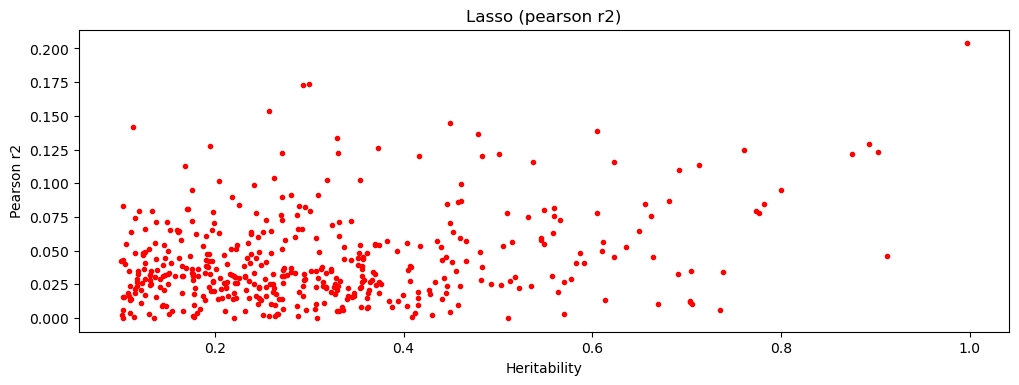

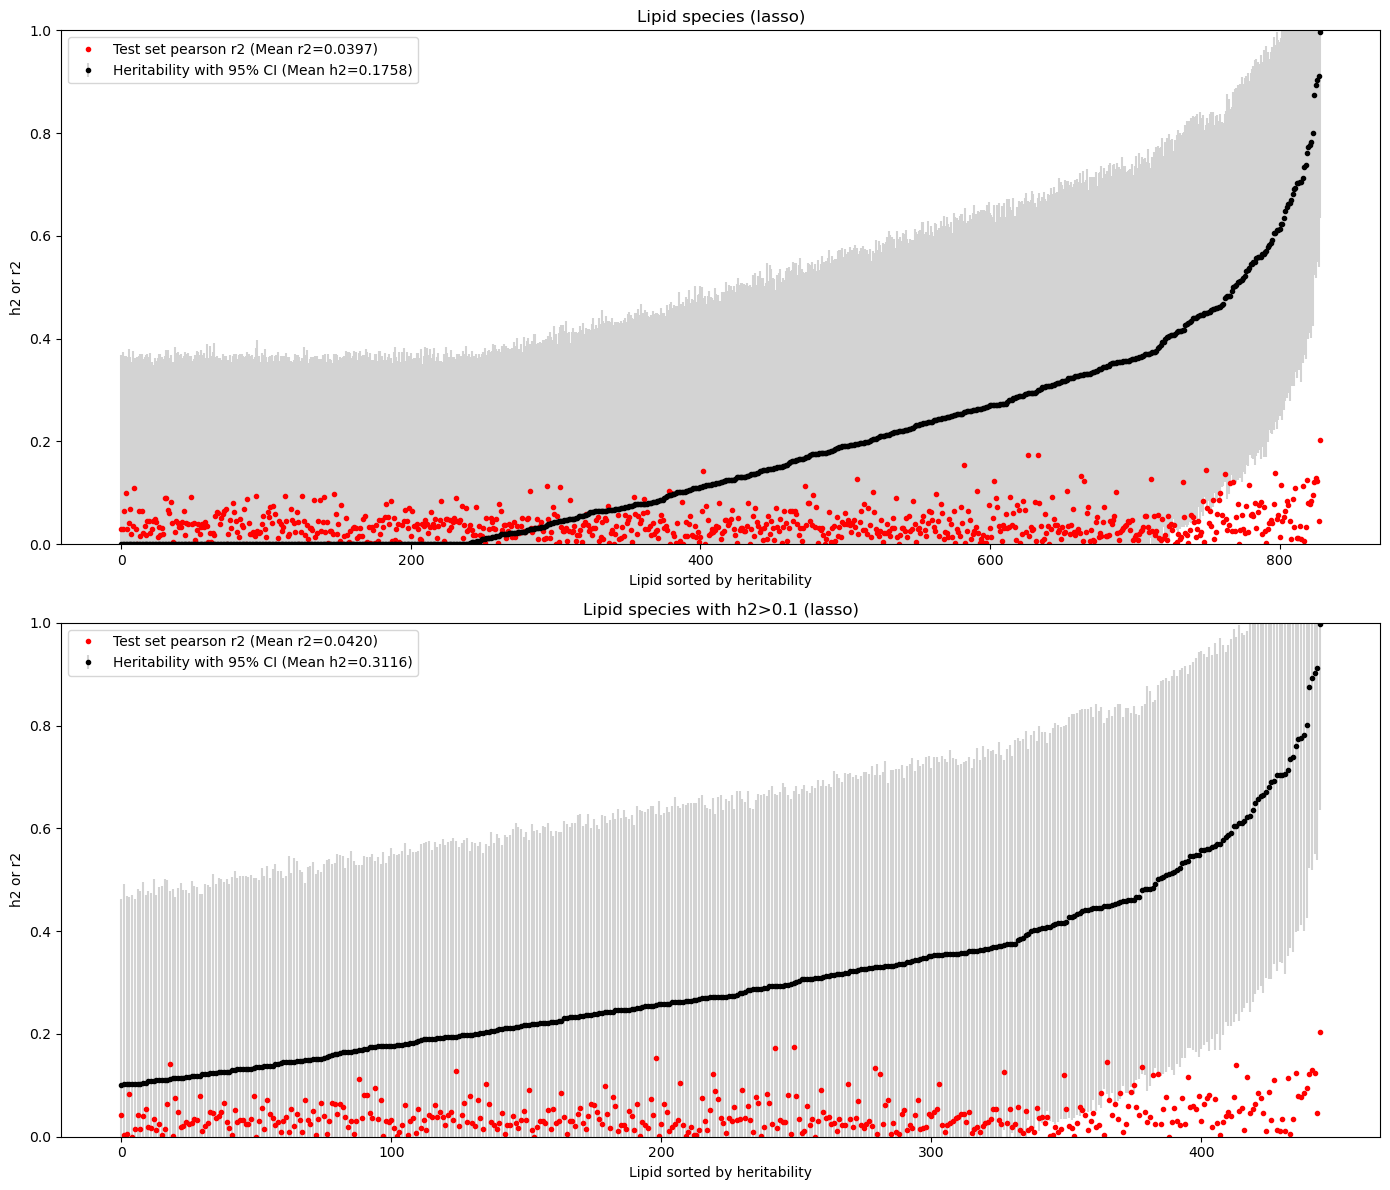

In [179]:
# Calculate pearson r2 of pred and observed
df_merged = df_obs.merge(df_pred, on='LABID', suffixes=('_true', '_pred'))

pearson_r2, spearman_r2 = [], []
for lipid in df_obs.columns[1:]:
    # if lipid=='PI(15-MHDA_20:4)\PI(17:0_20:4)':
    #     #Skip this lipid for now. Training failed due to file name issue
    #     pearson_r2.append(None)
    #     spearman_r2.append(None)
    #     continue
        
    pearson_r2.append(stats.pearsonr(df_merged[lipid+'_pred'], df_merged[lipid+'_true'])[0]**2)
    spearman_r2.append(stats.spearmanr(df_merged[lipid+'_pred'], df_merged[lipid+'_true'])[0]**2)
    # pearson_r2.append(stats.pearsonr(df_merged[lipid+'_pred'], df_merged[lipid+'_true'])[0])
    # spearman_r2.append(stats.spearmanr(df_merged[lipid+'_pred'], df_merged[lipid+'_true'])[0])
        
df_performance = pd.DataFrame(data=df_obs.columns[1:], columns=['lipid_species'])
df_performance['pearson_r2'] = pearson_r2
df_performance['spearman_r2'] = spearman_r2

# Calculate 95% CI
cols = ['lipid_species', 'lipid_class', 'heritability_unrelated', 'SE_unrelated']
df_performance_heritability = df_performance.merge(df_heritability_all, on='lipid_species')
df_performance_heritability.sort_values(by='heritability_unrelated', inplace=True)
df_performance_heritability['95CI'] = 1.96*df_performance_heritability['SE_unrelated']
df_performance_heritability.reset_index(drop=True, inplace=True)
display(df_performance_heritability.head(2))

# Plot heritability vs. model performance
threshold = 0.1
mask = df_performance_heritability['heritability_unrelated']>threshold
fig, ax = plt.subplots(dpi=100, figsize=(12, 4))
ax.plot(df_performance_heritability[mask]['heritability_unrelated'],
        df_performance_heritability[mask]['pearson_r2'],
        ls='', marker='.', color='r', label='Test set pearson r2')
ax.set_title('Lasso (pearson r2)')
ax.set_xlabel('Heritability')
ax.set_ylabel('Pearson r2')


fig_test, ax_test = plt.subplots(dpi=100, figsize=(14, 12), nrows=2)
ax_test[0].errorbar(df_performance_heritability.index, df_performance_heritability['heritability_unrelated'],
                 yerr=df_performance_heritability['95CI'], ls='', marker='.', color='k', ecolor='lightgrey',
                 label=f"Heritability with 95% CI (Mean h2={df_performance_heritability['heritability_unrelated'].mean():.4f})")
ax_test[0].plot(df_performance_heritability.index, df_performance_heritability['pearson_r2'],
             ls='', marker='.', color='r', label=f"Test set pearson r2 (Mean r2={df_performance_heritability['pearson_r2'].mean():.4f})")
ax_test[0].set_ylim(bottom=0, top=1)
ax_test[0].set_title('Lipid species (lasso)')
ax_test[0].set_xlabel('Lipid sorted by heritability')
ax_test[0].set_ylabel('h2 or r2')
ax_test[0].legend()

# Only plot SNPs with heritability over threshold
threshold = 0.1
mask = df_performance_heritability['heritability_unrelated']>threshold
ax_test[1].errorbar([x for x in range(len(df_performance_heritability[mask]))],
                 df_performance_heritability[mask]['heritability_unrelated'],
                 yerr=df_performance_heritability[mask]['95CI'],
                 ls='', marker='.', color='k', ecolor='lightgrey',
                 label=f"Heritability with 95% CI (Mean h2={df_performance_heritability[mask]['heritability_unrelated'].mean():.4f})")
ax_test[1].plot([x for x in range(len(df_performance_heritability[mask]))],
             df_performance_heritability[mask]['pearson_r2'],
             ls='', marker='.', color='r', label=f"Test set pearson r2 (Mean r2={df_performance_heritability[mask]['pearson_r2'].mean():.4f})")

ax_test[1].set_ylim(bottom=0, top=1)
ax_test[1].set_title(f'Lipid species with h2>{threshold} (lasso)')
ax_test[1].set_xlabel('Lipid sorted by heritability')
ax_test[1].set_ylabel('h2 or r2')
ax_test[1].legend()

fig_test.tight_layout()